# IsoformSwitchAnalyzeR

https://www.bioconductor.org/packages/release/bioc/vignettes/IsoformSwitchAnalyzeR/inst/doc/IsoformSwitchAnalyzeR.html


## Installation of IsoformSwitchAnalyzeR

In [1]:
suppressMessages(library(dplyr))
suppressMessages(library(IsoformSwitchAnalyzeR))
suppressMessages(library(tidyr))
suppressMessages(library(data.table))
suppressMessages(library(ggvenn))
suppressMessages(library(cowplot))
suppressMessages(library(UpSetR))
suppressMessages(library(GenomicFeatures))
setwd("/groups/dog/stage/enora/isoformswitch/")

In [2]:
switchList          <- readRDS(file = "outputISA/SwitchList.Rds")
switchList_DE = readRDS(file = "/groups/dog/stage/enora/isoformswitch/outputISA/SwitchList_DEXSeq_lncrna_resist.Rds")
subsetSwitchGB      <- readRDS(file = "outputISA/glioblastoma_lncrna_resist.Rds")
subsetSwitchGB_DE   <- readRDS(file = "outputISA/glioblastoma_DEXSeq_lncrna_resist.Rds")
subsetSwitchMn      <- readRDS(file = "outputISA/melanoma_lncrna_resist.Rds")
subsetSwitchMn_DE   <- readRDS(file = "outputISA/melanoma_DEXSeq_lncrna_resist.Rds")
subsetSwitchLC      <- readRDS(file = "outputISA/lung_cancer_lncrna_resist.Rds")
subsetSwitchLC_DE   <- readRDS(file = "outputISA/lung_cancer_DEXSeq_lncrna_resist.Rds")
subsetSwitchPC      <- readRDS(file = "outputISA/prostate_cancer_lncrna_resist.Rds")
subsetSwitchPC_DE   <- readRDS(file = "outputISA/prostate_cancer_DEXSeq_lncrna_resist.Rds")

## GLIOBLASTOMA

In [4]:
count_unique <- function(data){
    #isoforms_known  <- length(unique(data$isoformFeatures$isoform_id[grep("^[ENST.].*", data$isoformFeatures$isoform_id)]))
    #isoforms_new    <- length(unique(data$isoformFeatures$isoform_id[grep("^[tx.].*", data$isoformFeatures$isoform_id)]))
    #genes_known     <- length(unique(data$isoformFeatures$gene_id[grep("^[ENSG.].*", data$isoformFeatures$gene_id)]))
    #genes_new       <- length(unique(data$isoformFeatures$gene_id[grep("^[gene.].*", data$isoformFeatures$gene_id)]))
    #return(c(isoforms_known, isoforms_new, genes_known, genes_new))
    isoforms  <- length(unique(data$isoformFeatures$isoform_id))
    genes     <- length(unique(data$isoformFeatures$gene_id))
    return(c(isoforms, genes))
}

count_unique_DE <- function(data_DE){
    isoforms_DE <- length(unique(data_DE$isoformFeatures[abs(data_DE$isoformFeatures$dIF) > 0.1 & data_DE$isoformFeatures$isoform_switch_q_value < 0.05 , 3]))
    genes_DE    <- length(unique(data_DE$isoformFeatures[abs(data_DE$isoformFeatures$dIF) > 0.1 & data_DE$isoformFeatures$isoform_switch_q_value < 0.05, 4]))
    return(c(isoforms_DE, genes_DE))
}

# Create data frames for all and differentially expressed genes
df <- data.frame(
    "All"           = count_unique(switchList),
    "Glioblastoma"  = count_unique(subsetSwitchGB)
)

df_DE <- data.frame(
    "Glioblastoma"  = c(231, 842, 980, 0)
)

options(repr.plot.width=15, repr.plot.height=8)
cancerDF_all <- data.frame(
    types = c("isoforms", "genes"),
    count = df$All
)

cancerDF <- data.frame(
    types = c("isoforms", "genes"),
    count = df$Glioblastoma
)

cancerDF_DE <- data.frame(
    types = rep(c("isoforms", "genes"),2),
    switch = c(rep("",2), rep("nrSwitches",2)),
    count = df_DE$Glioblastoma
)
cancerDF_DE
p1 <- ggplot(cancerDF_all, aes(fill=types, y=count, x=types, group=types))+
    geom_bar(stat="identity", color="black") + #, position="stack", color="black", aes(alpha=prop)) +
    #facet_wrap( ~ cancer, nrow=1) +
    labs(x="All cancers", y="Counts", subtitle = "After importing data") +
    scale_alpha_manual(values=c(0.9, 0.3)) +
    geom_text(aes(label = count, y = ifelse(count > 1500, count, count + 3500)), position = position_stack(0.5), angle = 0, size= 5, color = "black") +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), plot.subtitle = element_text(hjust = 0.5, size = 15), text = element_text(size = 18)) +
    scale_fill_manual(values=c("#99E2FF", "#93C8A9"))

p2 <- ggplot(cancerDF, aes(fill=types, y=count, x=types, group=types))+
    geom_bar(stat="identity",color="black") + #, position="stack", color="black", aes(alpha=prop)) +
    #facet_wrap( ~ cancer, nrow=1) +
    labs(x="Glioblastoma", y="Counts", subtitle = "After subsetting and filtering \n (geneExpr = 1, isoformExpr = 0)") +
    scale_alpha_manual(values=c(0.9, 0.3)) +
    geom_text(aes(label = count, y = ifelse(count > 1500, count, count + 3500)), position = position_stack(0.5), angle = 0, size= 5, color = "black") +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), plot.subtitle = element_text(hjust = 0.5, size = 15), text = element_text(size = 18)) +
    scale_fill_manual(values=c("#99E2FF", "#93C8A9"))

p3 <-ggplot(cancerDF_DE, aes(fill=types, y=count, x=types, group=types))+
    #geom_bar(stat="identity") + #, position="stack", color="black", aes(alpha=prop)) +
    geom_bar(stat="identity",position="stack", color="black", aes(alpha=switch)) +
    #facet_wrap( ~ cancer, nrow=1) +
    labs(x="Glioblastoma", y="Counts", subtitle = "After DEXSeq analysis \n (alpha < 0.05, abs(dIF) > 0.1)") +
    scale_alpha_manual(values=c(0.3), limits = c('nrSwitches')) +
    geom_text( aes(label = ifelse(count > 0, count, ""), y = ifelse(count > 30, count, count + 50)), position = position_stack(0.5), angle = 0, size= 5, color = "black") +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), plot.subtitle = element_text(hjust = 0.5, size = 15), 
    text = element_text(size = 18),legend.spacing.x = unit(1.0, 'cm')) +
    scale_fill_manual(values=c("#99E2FF", "#93C8A9")) + guides(alpha=guide_legend(title="Switching Features")) 


plots <- list(p1, p2, p3)
prow <- plot_grid(p1+ theme(legend.position="none"), p2 + theme(legend.position="none"), p3 + theme(legend.position="none"), align = 'vh', hjust = -1, nrow = 1)
legend <- get_legend(p3 + theme(legend.box.margin = margin(0, 0, 0, 3), legend.title = element_text(size=18, face="bold", hjust=0.5), legend.text = element_text(size=18), legend.position = "bottom"))
prow2 <- plot_grid(prow, legend, nrow=2, rel_heights=c(0.1, 0.01, 0.1, 0.1))
title <- ggdraw() + draw_label("Number of isoforms and genes through IsoformSwitchAnalyzeR", fontface='bold', size=25)
pdf(paste("/groups/dog/stage/enora/isoformswitch/plots/counts_cancer", ".pdf", sep = ""), width = 15, height = 8)
plot_grid(title, prow2, nrow=2, rel_heights=c(0.1, 0.7,0.4,0.1))
dev.off()

types,switch,count
<chr>,<chr>,<dbl>
isoforms,,231
genes,,842
isoforms,nrSwitches,980
genes,nrSwitches,0


png 
  2

`summarise()` has grouped output by 'Var1'. You can override using the `.groups` argument.


biotype,type,frequency
<chr>,<chr>,<int>
protein_coding,with_DE,3203
others,with_DE,2063
lncRNA,with_DE,564
protein_coding,without_DE,37835
others,without_DE,23717
lncRNA,without_DE,12729


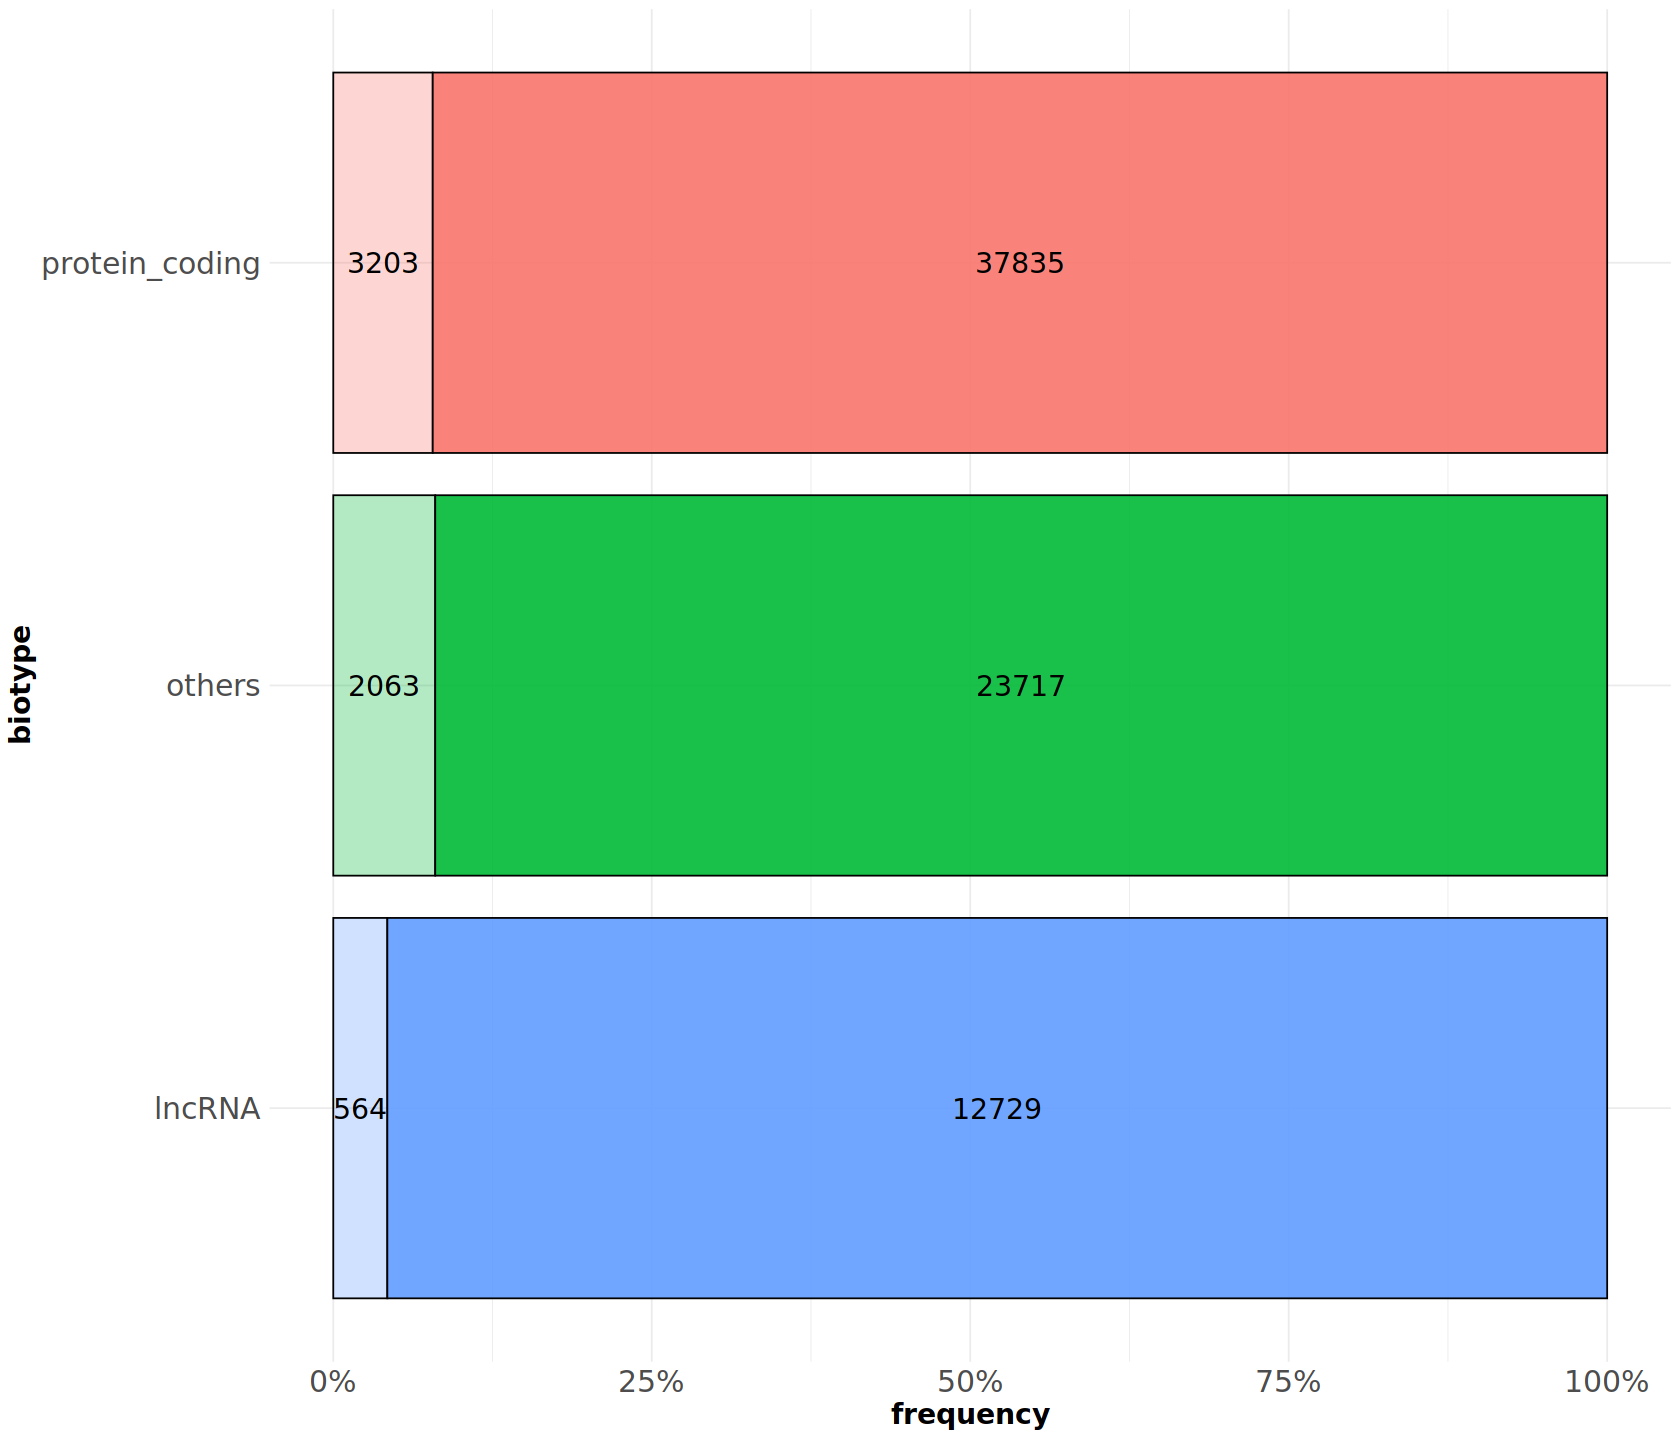

In [4]:
isoformsGB = subsetSwitchGB$isoformFeatures[!duplicated(subsetSwitchGB$isoformFeatures$isoform_id), ]

isoformsGB_DE = subsetSwitchGB_DE$isoformFeatures[!duplicated(subsetSwitchGB_DE$isoformFeatures$isoform_id), ]

biotypes_GB = merge(data.frame(table(isoformsGB$iso_biotype), "type" = rep("without_DE", length(unique(isoformsGB$iso_biotype)))), data.frame(table(isoformsGB_DE$iso_biotype), "type" = rep("with_DE", length(unique(isoformsGB_DE$iso_biotype)))), all = TRUE)

data_frames <- list(data.frame(biotypes_GB))
names(data_frames) <- c("GB")

# loop through each data frame
for (i in seq_along(data_frames)) {
    df_sum <- data_frames[[i]] %>%
        group_by(Var1, type) %>%
        summarize(Freq_sum = sum(Freq))

    df_sum_others <- df_sum %>%
        filter(!Var1 %in% c("lncRNA", "protein_coding")) %>%
        group_by(type) %>%
        summarize(Var1 = "others", Freq_sum = sum(Freq_sum))
        
    
    # Combine the new row with the original data.frame
    df_sum <- bind_rows(df_sum %>% filter(Var1 %in% c("lncRNA", "protein_coding")), df_sum_others)

    # Order the rows by decreasing Freq_sum
    df_sum <- df_sum[order(df_sum$type, -df_sum$Freq_sum),]

    data_frames[[i]] <- df_sum

    colnames(data_frames[[i]]) <- c("biotype", "type", "frequency")
    #data_frames[[i]]$type<-reorder(data_frames[[i]]$type, data_frames[[i]]$type,FUN=function(x) mean(as.numeric(x)))
    #data_frames[[i]]$biotype <- factor(data_frames[[i]]$biotype, levels = data_frames[[i]]$biotype[order(data_frames[[i]]$frequency)])
}
data_frames
p1 <- ggplot(data=data_frames$GB, aes(x=biotype, y=frequency, fill=biotype, group=biotype)) + 
    geom_bar(stat="identity",position= position_fill(reverse = TRUE), color="black", aes(alpha=type)) + 
    coord_flip() +
    geom_text( aes(label = frequency), stat="identity", position = position_fill(vjust = 0.5), size=6) +
    scale_fill_hue(direction=-1)  + 
    theme_minimal() + 
    scale_y_continuous(labels = scales::percent) +
    scale_alpha_manual(values=c(0.3, 0.9)) +
    theme(legend.position="none", axis.text=element_text(size=18),axis.title=element_text(size=17,face="bold"))
options(repr.plot.width=14, repr.plot.height=12)
p1
#plots <- list(p1, p2, p3, p4)
#legend <- get_legend(p1 + guides(color = guide_legend(nrow = 2)) + theme(legend.box.margin = margin(0, 0, 0, 3),legend.title = element_text(size=15, face="bold", hjust=0.5), legend.text = element_text(size=15), legend.box = "vertical",legend.position = "top"))
#prow <- plot_grid(p1, p2, p3, p4, align = 'vh', labels = c("Glioblastoma", "Melanoma", "Lung Cancer", "Prostate Cancer"), label_size = 16, hjust = -0.5, nrow=2)
#prow2 <- plot_grid(legend, prow, nrow=2, rel_heights=c(0.1, 0.7, 0, 0))
#title <- ggdraw() + draw_label("Frequency of differents biotypes in 4 cancers \n For two conditions, sensitive and resistance, in three replicats", fontface='bold', size=20)
#pdf(paste("biotypes_frequency", ".pdf", sep = ""), width = 12, height = 7)
#plot_grid(title, prow2, nrow=2, rel_heights=c(0.1, 2, 0.1, 0.1))
#dev.off()

Warning message:
"Removed 259 rows containing missing values (`geom_point()`)."


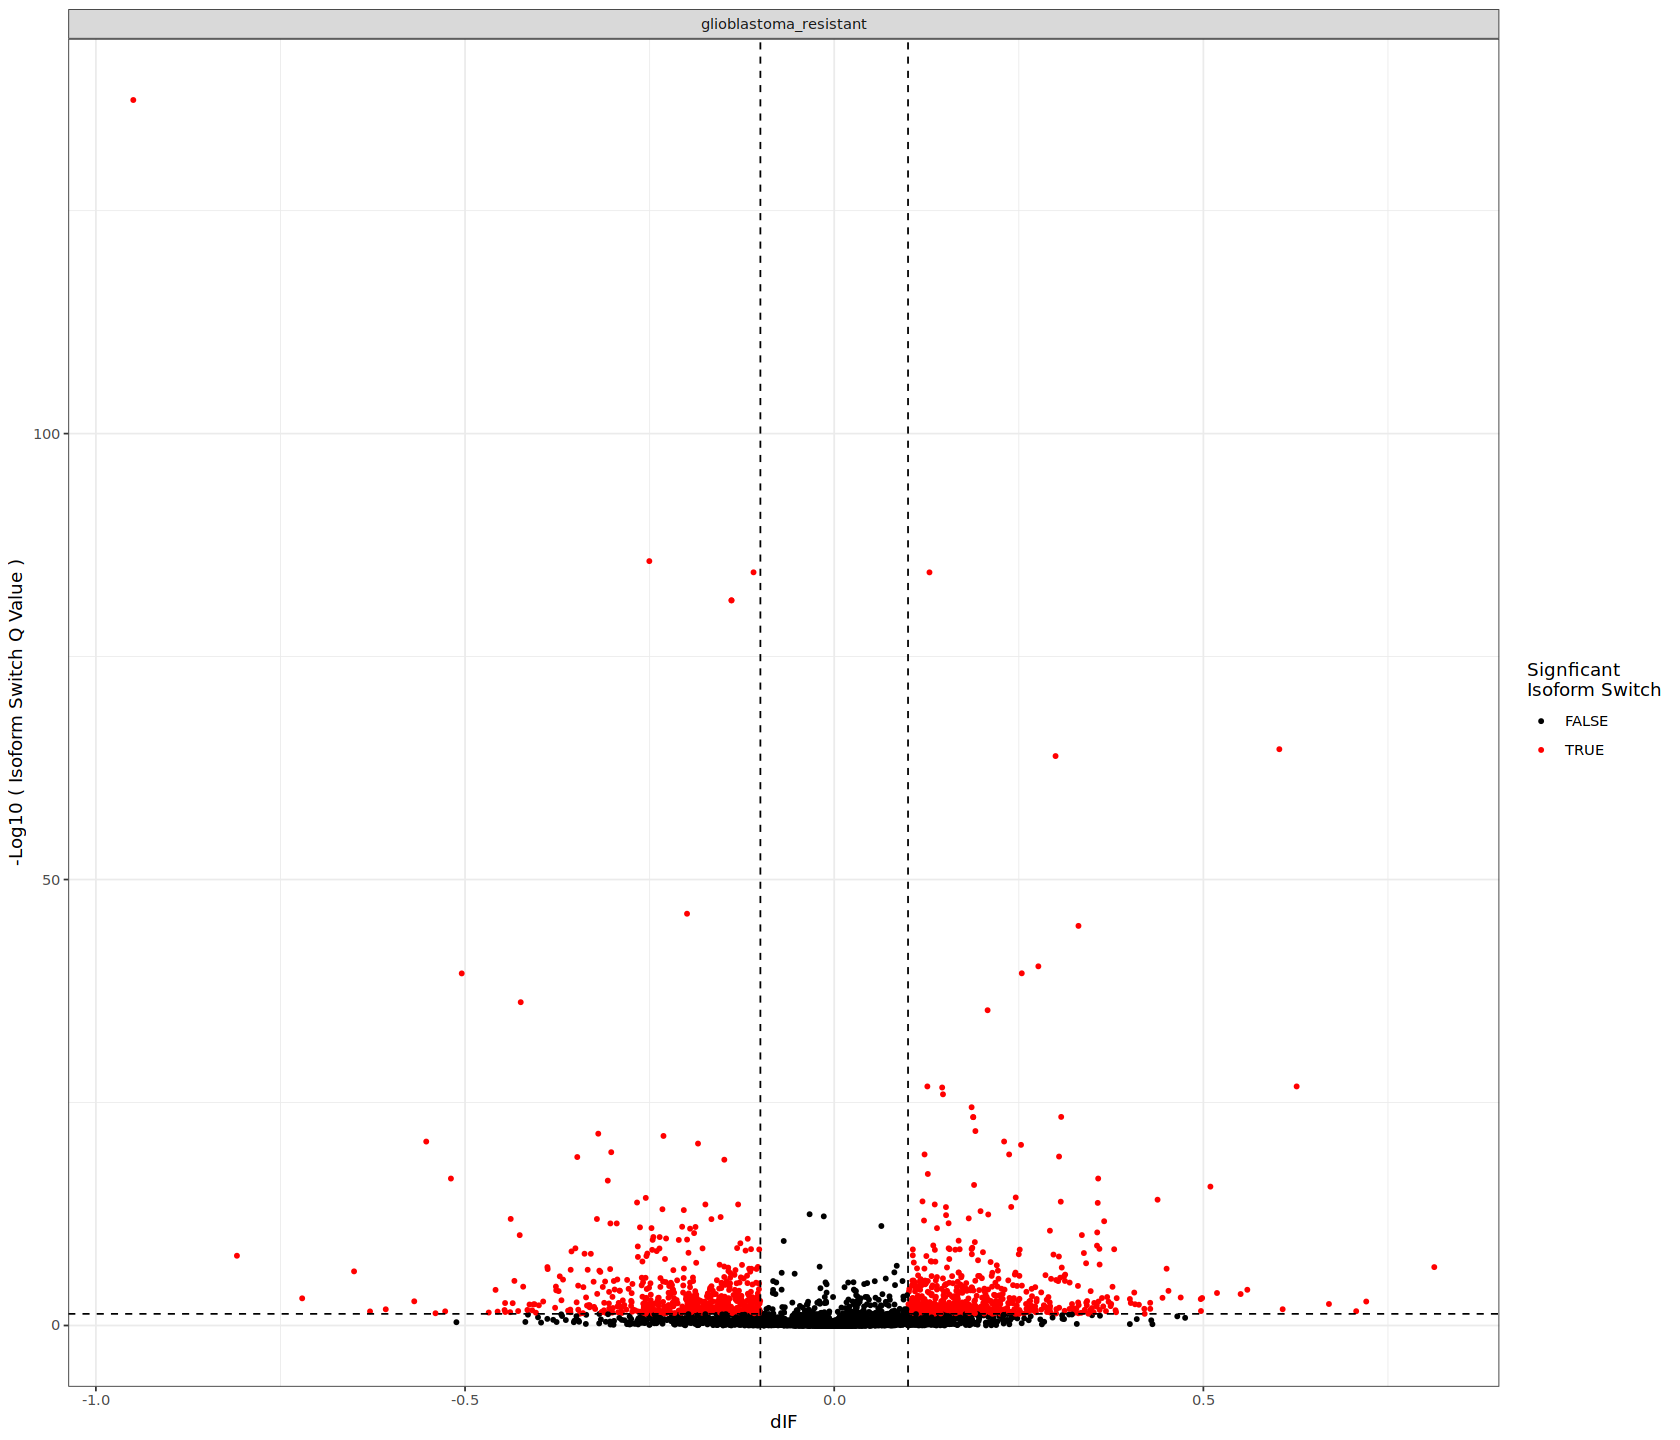

In [5]:
p1 <- ggplot(data=subsetSwitchGB_DE$isoformFeatures, aes(x=dIF, y=-log10(isoform_switch_q_value))) +
    geom_point(
        aes( color=abs(dIF) > 0.1 & isoform_switch_q_value < 0.05 ), # default cutoff
        size=1
    ) +
    geom_hline(yintercept = -log10(0.05), linetype='dashed') + # default cutoff
    geom_vline(xintercept = c(-0.1, 0.1), linetype='dashed') + # default cutoff
    facet_wrap( ~ condition_2) +
    #facet_grid(condition_1 ~ condition_2) + # alternative to facet_wrap if you have overlapping conditions
    scale_color_manual('Signficant\nIsoform Switch', values = c('black','red')) +
    labs(x='dIF', y='-Log10 ( Isoform Switch Q Value )') +
    theme_bw()
p1

In [75]:
SwitchList <- readRDS(file = "outputISA/All_lncrna_resist.Rds")
GbDESeq <- readRDS(file = "/groups/dog/stage/enora/DESeq2/U251DESeq_lncrna_resist.Rds")
GbDESeq <- subset(data.frame(results(GbDESeq)), abs(data.frame(results(GbDESeq))$log2FoldChange) > 1  & data.frame(results(GbDESeq))$padj < 0.05)
#GbDESeq <- unique(SwitchList$isoformFeatures[SwitchList$isoformFeatures$isoform_id %in% rownames(GbDESeq), 4 ])
MnDESeq <- readRDS(file = "/groups/dog/stage/enora/DESeq2/501MelDESeq_lncrna_resist.Rds")
MnDESeq <- subset(data.frame(results(MnDESeq)), abs(data.frame(results(MnDESeq))$log2FoldChange) > 1  & data.frame(results(MnDESeq))$padj < 0.05)
MnDESeq <- unique(SwitchList$isoformFeatures[SwitchList$isoformFeatures$isoform_id %in% rownames(MnDESeq), 4 ])
LcDESeq <- readRDS(file = "/groups/dog/stage/enora/DESeq2/ADCA72DESeq_lncrna_resist.Rds")
LcDESeq <- subset(data.frame(results(LcDESeq)), abs(data.frame(results(LcDESeq))$log2FoldChange) > 1  & data.frame(results(LcDESeq))$padj < 0.05)
LcDESeq <- unique(SwitchList$isoformFeatures[SwitchList$isoformFeatures$isoform_id %in% rownames(LcDESeq), 4 ])
PcDESeq <- readRDS(file = "/groups/dog/stage/enora/DESeq2/PC3DESeq_lncrna_resist.Rds")
PcDESeq <- subset(data.frame(results(PcDESeq)), abs(data.frame(results(PcDESeq))$log2FoldChange) > 1  & data.frame(results(PcDESeq))$padj < 0.05)
PcDESeq <- unique(SwitchList$isoformFeatures[SwitchList$isoformFeatures$isoform_id %in% rownames(PcDESeq), 4 ])

In [78]:
write.table(GbDESeq, "GBDE.txt")

In [27]:
subsetSwitchGB_DE$isoformFeatures[subsetSwitchGB_DE$isoformFeatures$gene_id == "ENSG00000235453",]

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
173514,isoComp_00173514,geneComp_00025445,ENST00000425533,ENSG00000235453,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,nonsense_mediated_decay,46.73379,⋯,4.532292e-01,1.120143,NA,0.01709583,0.004600000,0.03556667,0.030966667,7.979854e-01,3.960567e-138,TRUE
173515,isoComp_00173515,geneComp_00025445,ENST00000450093,ENSG00000235453,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,protein_coding,46.73379,⋯,2.227626e+00,10.529101,NA,0.19984167,0.000000000,0.60290000,0.602900000,2.434534e-65,3.960567e-138,FALSE
173517,isoComp_00173517,geneComp_00025445,ENST00000453396,ENSG00000235453,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,protein_coding,46.73379,⋯,6.578709e-01,5.361399,NA,0.11055417,0.002066667,0.30186667,0.299800000,1.434431e-64,3.960567e-138,FALSE
173519,isoComp_00173519,geneComp_00025445,ENST00000644531,ENSG00000235453,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,protein_coding,46.73379,⋯,1.965616e-01,-1.217607,NA,0.02333333,0.035000000,0.04276667,0.007766667,6.055167e-01,3.960567e-138,FALSE
173520,isoComp_00173520,geneComp_00025445,ENST00000692500,ENSG00000235453,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,protein_coding,46.73379,⋯,2.557007e-08,-12.718261,NA,0.63712083,0.949333333,0.00000000,-0.949333333,3.960567e-138,3.960567e-138,FALSE


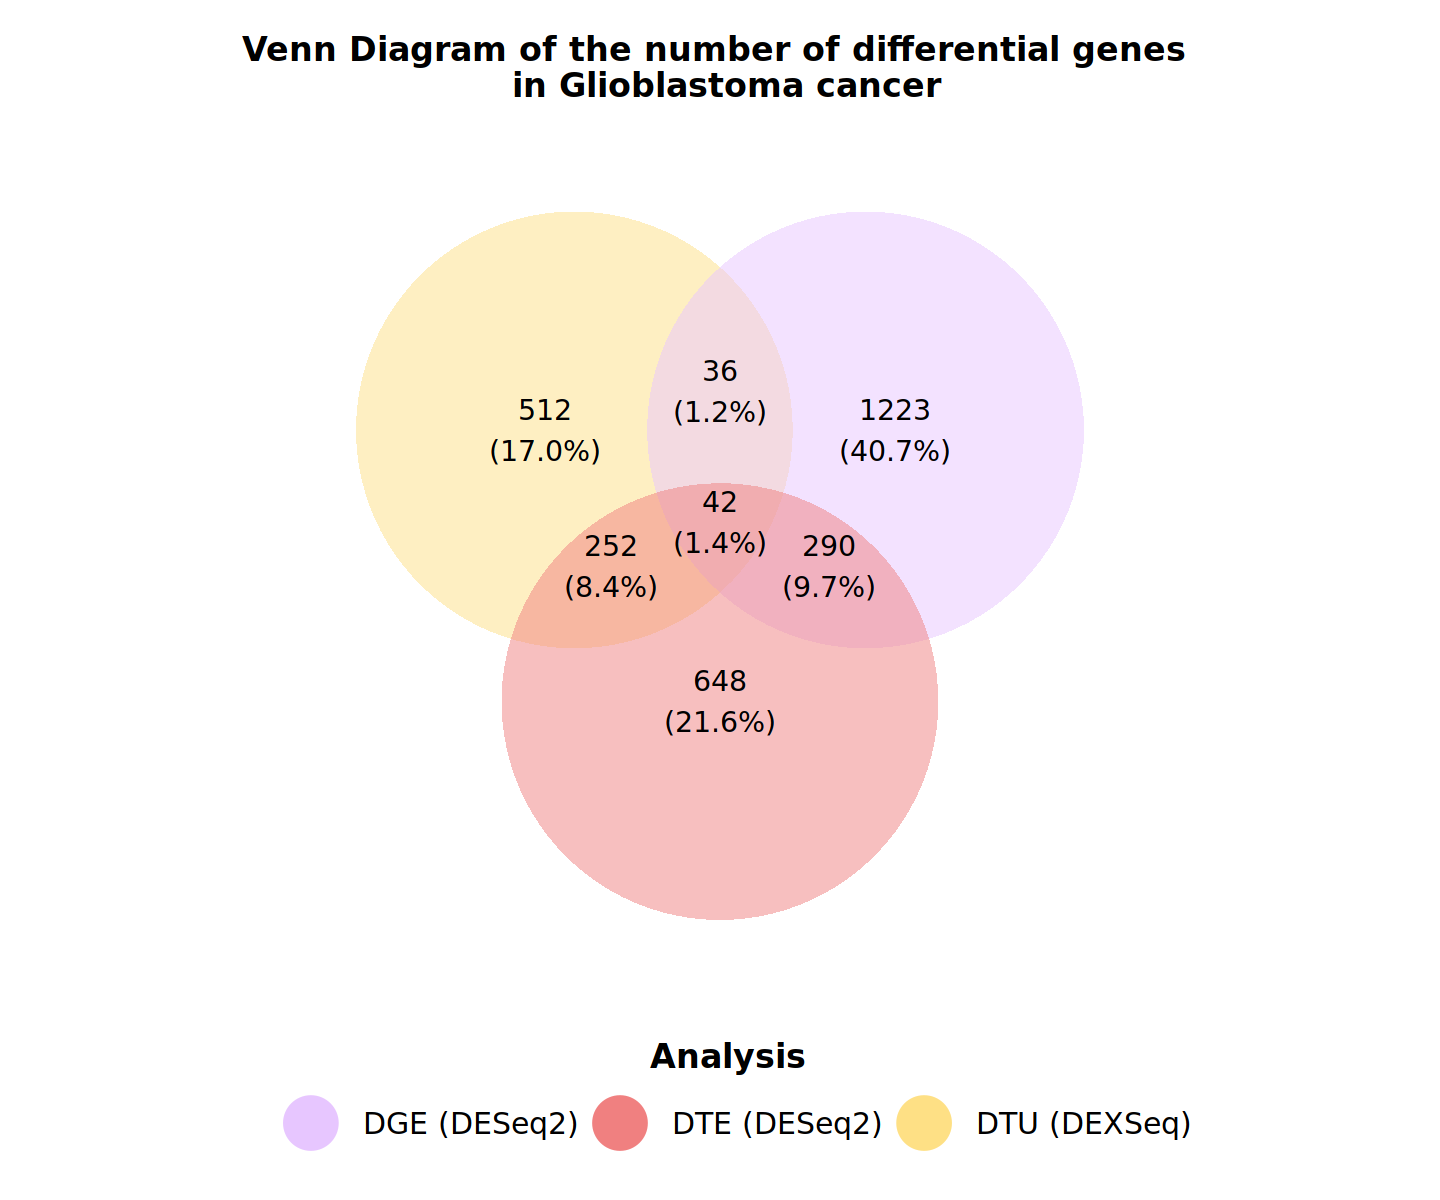

In [56]:
data <- data.frame(Xdata = rnorm(3), Ydata = rnorm(3), Analysis = c('DTU (DEXSeq)', 'DGE (DESeq2)', 'DTE (DESeq2)' ))
gplot <- ggplot(data, aes(Xdata, Ydata, color = Analysis)) + geom_point(size = 15) + scale_color_manual(values = c("#e7c6ff", "#f08080", "#FEE085")) + theme(legend.key=element_blank(),legend.background=element_blank())

genesAurore = read.csv("/groups/dog/nanopore/lncrna_resist_cgo/secondary/5_DE/up_down_DEG_deseq2_allCancers_padj0.05_LFC1.csv")
genesGB <- list(DTU = unique(subsetSwitchGB_DE$isoformFeatures[abs(subsetSwitchGB_DE$isoformFeatures$dIF) > 0.1 & subsetSwitchGB_DE$isoformFeatures$isoform_switch_q_value < 0.05, 4]), DGE = unique(genesAurore[genesAurore$cancer=="glioblastoma", 1]), DTE = unique(GbDESeq))
genesMn <- list(DTU = unique(subsetSwitchMn_DE$isoformFeatures[abs(subsetSwitchMn_DE$isoformFeatures$dIF) > 0.1 & subsetSwitchMn_DE$isoformFeatures$isoform_switch_q_value < 0.05, 4]), DGE = unique(genesAurore[genesAurore$cancer=="melanoma", 1]), DTE = unique(MnDESeq))
genesLC <- list(DTU = unique(subsetSwitchLC_DE$isoformFeatures[abs(subsetSwitchLC_DE$isoformFeatures$dIF) > 0.1 & subsetSwitchLC_DE$isoformFeatures$isoform_switch_q_value < 0.05, 4]), DGE = unique(genesAurore[genesAurore$cancer=="lung_cancer", 1]), DTE = unique(LcDESeq))
genesPC <- list(DTU = unique(subsetSwitchPC_DE$isoformFeatures[abs(subsetSwitchPC_DE$isoformFeatures$dIF) > 0.1 & subsetSwitchPC_DE$isoformFeatures$isoform_switch_q_value < 0.05, 4]), DGE = unique(genesAurore[genesAurore$cancer=="prostate_cancer", 1]), DTE = unique(PcDESeq))

options(repr.plot.width=12, repr.plot.height=10)
p1 <- ggvenn(genesGB, fill_color = c('#FEE085', "#e7c6ff", "#f08080"), stroke_size = 0, set_name_size = 0, text_size = 6)
p2 <- ggvenn(genesMn, fill_color = c('#FEE085', "#e7c6ff", "#f08080"), stroke_size = 0.2, set_name_size = 0, text_size = 5)
p3 <- ggvenn(genesLC, fill_color = c('#FEE085', "#e7c6ff", "#f08080"), stroke_size = 0.2, set_name_size = 0, text_size = 5)
p4 <- ggvenn(genesPC, fill_color = c('#FEE085', "#e7c6ff", "#f08080"), stroke_size = 0.2, set_name_size = 0, text_size = 5)

#plots <- list(p1, p2, p3, p4)
#legend <- get_legend(gplot + theme(legend.box.margin = margin(0, 0, 0, 12), legend.title = element_text(size=15, face="bold", hjust=0.5), legend.text = element_text(size=15), legend.box = "vertical",legend.position = "top"))
#prow <- plot_grid(p1, p2, p3, p4, align = 'vh', labels = c("Glioblastoma", "Melanoma", "Lung", "Prostate"), label_size = 15, hjust = -1, vjust = -0.3, nrow=2)
#prow2 <- plot_grid(legend,prow, nrow=2, rel_heights=c(0.1, 0.7, 0, 0))
#title <- ggdraw() + draw_label("Venn Diagrams of the number of genes DE of different analysis", fontface='bold', size=20)
#pdf(paste("venndiag_percancer", ".pdf", sep = ""), width = 12, height = 7)
#plot_grid(title, prow2, nrow=2, rel_heights=c(0.03, 0.8, 0.05, 0))
#dev.off()
prow <- plot_grid(p1, align = 'vh', hjust = -1, vjust = -0.3, nrow=1)
legend <- get_legend(
    gplot + 
    theme(
        legend.box.margin = margin(0, 2, 0, 12), legend.title = element_text(size=20, face="bold", hjust=0.5),
        #legend.background = element_rect(fill="#e5e5e5", size=0.5, linetype="solid", colour ="black"),
        #legend.spacing.x = unit(0.8, 'cm'), 
        legend.text = element_text(size=18), legend.box = "horizontal",legend.position = "top") +
    guides(color = guide_legend(title.position = "top", title.hjust = 0.5))
) 
prow2 <- plot_grid(prow, legend, nrow=2, rel_heights=c(3, 0.7, 1, 2))
title <- ggdraw() + draw_label("Venn Diagram of the number of differential genes \n in Glioblastoma cancer", fontface='bold', size=20)
#pdf(paste("venndiag_percancer", ".pdf", sep = ""), width = 9, height = 7)
plot_grid(title, prow2, nrow=2, rel_heights=c(0.1, 0.8, 0.05, 0))
#dev.off()

In [58]:
length(unique(genesGB$DGE))

[1] 1591

In [63]:
genes_DGE_DTE_DTU = Reduce(intersect, list(genesGB$DGE, genesGB$DTE, genesGB$DTU))

In [52]:
'ENSG00000073150','ENSG00000115963','ENSG00000132507','ENSG00000136932','ENSG00000141510',
'ENSG00000160072','ENSG00000171346','ENSG00000172375','ENSG00000173264','ENSG00000173653',
'ENSG00000204267','ENSG00000237248','ENSG00000242802','ENSG00000255526','ENSG00000263934',
'ENSG00000285053','ENSG00000074527','ENSG00000075651','ENSG00000078114','ENSG00000079482',
'ENSG00000107902','ENSG00000110628','ENSG00000115363','ENSG00000127863','ENSG00000129007',
'ENSG00000140262','ENSG00000163798','ENSG00000164056','ENSG00000166068','ENSG00000173209',
'ENSG00000176473','ENSG00000187609','ENSG00000188641','ENSG00000215845','ENSG00000223745',
'ENSG00000226471','ENSG00000235652','ENSG00000250222','ENSG00000258818','ENSG00000272398',
'ENSG00000275532','ENSG00000278791'

[1] "DTU" "DGE" "DTE"

In [ ]:
source("/groups/dog/stage/enora/IsoPlotR_package/R/IsoPlotR.r")
isoplot <- plot_iso(exonsBestGene, output="/groups/dog/stage/enora/isoformswitch/iso")
boxplotR <- 
    ggplot(tab) +
    aes(x =isoform_id , y = U251_R, fill=isoform_id) +
    scale_y_discrete(name ="Splicing ratio")+
    geom_boxplot(fill=c("#AF93B4", "#FFA9A3", "#B9E6FF")) +
    #scale_fill_brewer(fill=c("#AF93B4", "#FFA9A3", "#B9E6FF")) +
    theme_minimal() +
    theme(
        plot.title = element_text(face = "bold", hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5)) +
    labs(title = "Glioblastoma samples with resistance", subtitle = "U251_TMZ_R")

boxplotS <- 
    ggplot(tab) +
    aes(x =isoform_id , y = U251_S, fill=isoform_id) +
    scale_y_discrete(name ="Splicing ratio")+
    geom_boxplot(fill=c("#AF93B4", "#FFA9A3", "#B9E6FF")) +
    #scale_fill_brewer(fill=c("#AF93B4", "#FFA9A3", "#B9E6FF")) +
    theme_minimal() +
    theme(
        plot.title = element_text(face = "bold", hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5)) +
    labs(title = "Glioblastoma samples with sensitivity", subtitle = "U251_S")

plots <- list(boxplotR, boxplotS)
iso <- plot_grid(plotlist=isoplot, ncol=1)
boxplot <- plot_grid(plotlist=plots, ncol=2)

title <- ggdraw() + draw_label(paste0("Exonic structures of isoforms of gene ENSG00000235453" ), fontface='bold', size=20)
#options(repr.plot.width=20, repr.plot.height=12)

#
plot_grid( title, iso, boxplot, ncol=1,  rel_heights=c(0.1, 0.7,0.4,0.1)) # rel_heights values control title margins
#isoplot

In [4]:
Gb_DE <- readRDS(file = "/groups/dog/stage/enora/isoformswitch/outputISA/glioblastomaisoformFeatures.Rds")
Mn_DE <- readRDS(file = "/groups/dog/stage/enora/isoformswitch/outputISA/melanomaisoformFeatures.Rds")
LC_DE <- readRDS(file = "/groups/dog/stage/enora/isoformswitch/outputISA/lung_cancerisoformFeatures.Rds")
PC_DE <- readRDS(file = "/groups/dog/stage/enora/isoformswitch/outputISA/prostate_cancerisoformFeatures.Rds")

In [44]:
PC_DE[PC_DE$gene_id == "ENSG00000080822",]

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
770710,isoComp_00770710,geneComp_00179075,ENST00000341181,ENSG00000080822,prostate_cancer_sensitive,prostate_cancer_resistant,NA,protein_coding,protein_coding,39.69343,⋯,2.547336,-1.398417,NA,0.5575000,0.68746667,0.5062667,-0.1812000,0.042265433,0.008706074,FALSE
770717,isoComp_00770717,geneComp_00179075,ENST00000503004,ENSG00000080822,prostate_cancer_sensitive,prostate_cancer_resistant,NA,protein_coding,protein_coding,39.69343,⋯,1.428719,1.584393,NA,0.1803083,0.04876667,0.3024000,0.2536333,0.008706074,0.008706074,FALSE


In [ ]:
switchList$isoformFeatures[switchList$isoformFeatures$gene_id == "ENSG00000080822" & abs(switchList$isoformFeatures$dIF) >0.1, c(3,4,5,6,7,27,28)]

In [37]:
AllTx <- list(
    'Glioblastoma' = Gb_DE$isoform_id, 
    'Melanoma' = Mn_DE$isoform_id, 
    'Lung Cancer' = LC_DE$isoform_id, 
    'Prostate Cancer' = PC_DE$isoform_id)
pdf(paste("upsetplot_DTU", ".pdf", sep = ""), width = 20, height = 10)
UpSetR::upset(
    fromList(AllTx), 
    mainbar.y.label = "Intersection size",
    sets.x.label = "Number of DTUs",
    keep.order=TRUE, 
    mb.ratio = c(0.6, 0.4),
    #set_size.show = TRUE,
    sets.bar.color=c("#ffc2d1",  "#a2d2ff", "#fcbf49", "#d4e09b"),
    point.size = 6, line.size = 2, text.scale=3,
    queries = list(
        list(
            query = intersects, 
            params = list("Glioblastoma", "Lung Cancer", "Prostate Cancer"), 
            active = T,
            color = "red"),
        list(
            query = intersects, 
            params = list("Glioblastoma", "Prostate Cancer", "Melanoma"), 
            active = T,
            color = "blue"))
    )
#options(repr.plot.width=15, repr.plot.height=10)
grid.text("Distribution of differentially used isoforms across all cancers", x = 0.70, y = 0.95, gp = gpar(fontsize = 25, fontface="bold"))
dev.off()

png 
  2

In [83]:
length(AllTx$`Prostate Cancer`)

[1] 471

In [35]:
Reduce(intersect, list(AllTx$`Melanoma`, AllTx$Glioblastoma, AllTx$`Prostate Cancer`))

[1] "ENST00000503004" "ENST00000613865" "ENST00000644980"

### Down-regulated transcripts DEXSeq

In [7]:
downRegTx <- list(
    'Glioblastoma' = Gb_DE$isoform_id[Gb_DE$dIF < 0.1], 
    'Melanoma' = Mn_DE$isoform_id[Mn_DE$dIF < 0.1], 
    'Lung Cancer' = LC_DE$isoform_id[LC_DE$dIF < 0.1], 
    'Prostate Cancer' = PC_DE$isoform_id[PC_DE$dIF < 0.1])
#pdf(paste("upsetplot_downDTU", ".pdf", sep = ""), width = 12, height = 7)
p1 <- UpSetR::upset(
    fromList(downRegTx), 
    #
    mainbar.y.label = "Intersection size",
    sets.x.label = "Number of DTUs",
    keep.order=TRUE, 
    sets.bar.color=c("#ffc2d1",  "#a2d2ff", "#fcbf49", "#d4e09b"),
    point.size = 4, line.size = 1, text.scale=2,
    queries = list(
        list(
            query = intersects, 
            params = list("Glioblastoma"), 
            active = T,
            color = "#ffc2d1"),
        list(
            query = intersects, 
            params = list("Prostate Cancer"), 
            active = T,
            color = "#a2d2ff"),
        list(
            query = intersects, 
            params = list("Melanoma"), 
            active = T,
            color = "#fcbf49"),
        list(
            query = intersects, 
            params = list("Lung Cancer"), 
            active = T,
            color = "#d4e09b"))
    )
#pdf(paste("upsetplot_downDTUs", ".pdf", sep = ""), width = 8, height = 7)
#options(repr.plot.width=8, repr.plot.height=8)
#p1
#cowplot::plot_grid(NULL, p1$Main_bar, p1$Sizes, p1$Matrix,
#    nrow=2, align='v', rel_heights = c(3,1),
#    rel_widths = c(2,3))
#cowplot::plot_grid(p1)
#grid.text("Upset plot of down-regulated DTUs \n across all cancers",x = 0.65, y=0.95, gp=gpar(fontsize=20, fontface = "bold")) 
#dev.off()

In [18]:
Reduce(intersect, list(downRegTx$`Prostate Cancer`, downRegTx$Melanoma))

[1] "ENST00000585134" "ENST00000613865"

In [10]:
Reduce(intersect, list(upRegTx$Glioblastoma, upRegTx$`Lung Cancer`))

[1] "ENST00000507721" "tx.1418"         "ENST00000665667"

In [9]:
tx = c("ENST00000698938","ENST00000336458","tx.6180","ENST00000307892","ENST00000416016","ENST00000326019","ENST00000585134","ENST00000613865","ENST00000503004","tx.2845","ENST00000616140","ENST00000407422","ENST00000292147","ENST00000367602","ENST00000395425","ENST00000339514","ENST00000301686","ENST00000676715","ENST00000296591","ENST00000312046","ENST00000254043","ENST00000534073","ENST00000655550","ENST00000463876","ENST00000644980","ENST00000531480","ENST00000644036","tx.2166","ENST00000392757","ENST00000367600","ENST00000247191","ENST00000338401","ENST00000560748","ENST00000474420","ENST00000310442","ENST00000507721","tx.1418","ENST00000665667","ENST00000507721","tx.1418","ENST00000665667")

### Up-regulated transcripts DEXSeq

In [8]:
upRegTx <- list(
    'Glioblastoma' = Gb_DE$isoform_id[Gb_DE$dIF > 0.1], 
    'Melanoma' = Mn_DE$isoform_id[Mn_DE$dIF > 0.1], 
    'Lung Cancer' = LC_DE$isoform_id[LC_DE$dIF > 0.1],
    'Prostate Cancer' = PC_DE$isoform_id[PC_DE$dIF > 0.1])
#pdf(paste("upsetplot_upDTU", ".pdf", sep = ""), width = 12, height = 7)
p2 <- UpSetR::upset(
    fromList(upRegTx), 
    keep.order=TRUE,
    mainbar.y.label = "Intersection size",
    sets.x.label = "Number of DTUs",
    sets.bar.color=c("#ffc2d1",  "#a2d2ff", "#fcbf49", "#d4e09b"),
    point.size = 4, line.size = 1, text.scale = 2,
    queries = list(
        list(
            query = intersects, 
            params = list("Glioblastoma"), 
            active = T,
            color = "#ffc2d1"),
        list(
            query = intersects, 
            params = list("Prostate Cancer"), 
            active = T,
            color = "#a2d2ff"),
        list(
            query = intersects, 
            params = list("Melanoma"), 
            active = T,
            color = "#fcbf49"),
        list(
            query = intersects, 
            params = list("Lung Cancer"), 
            active = T,
            color = "#d4e09b")
    )
)

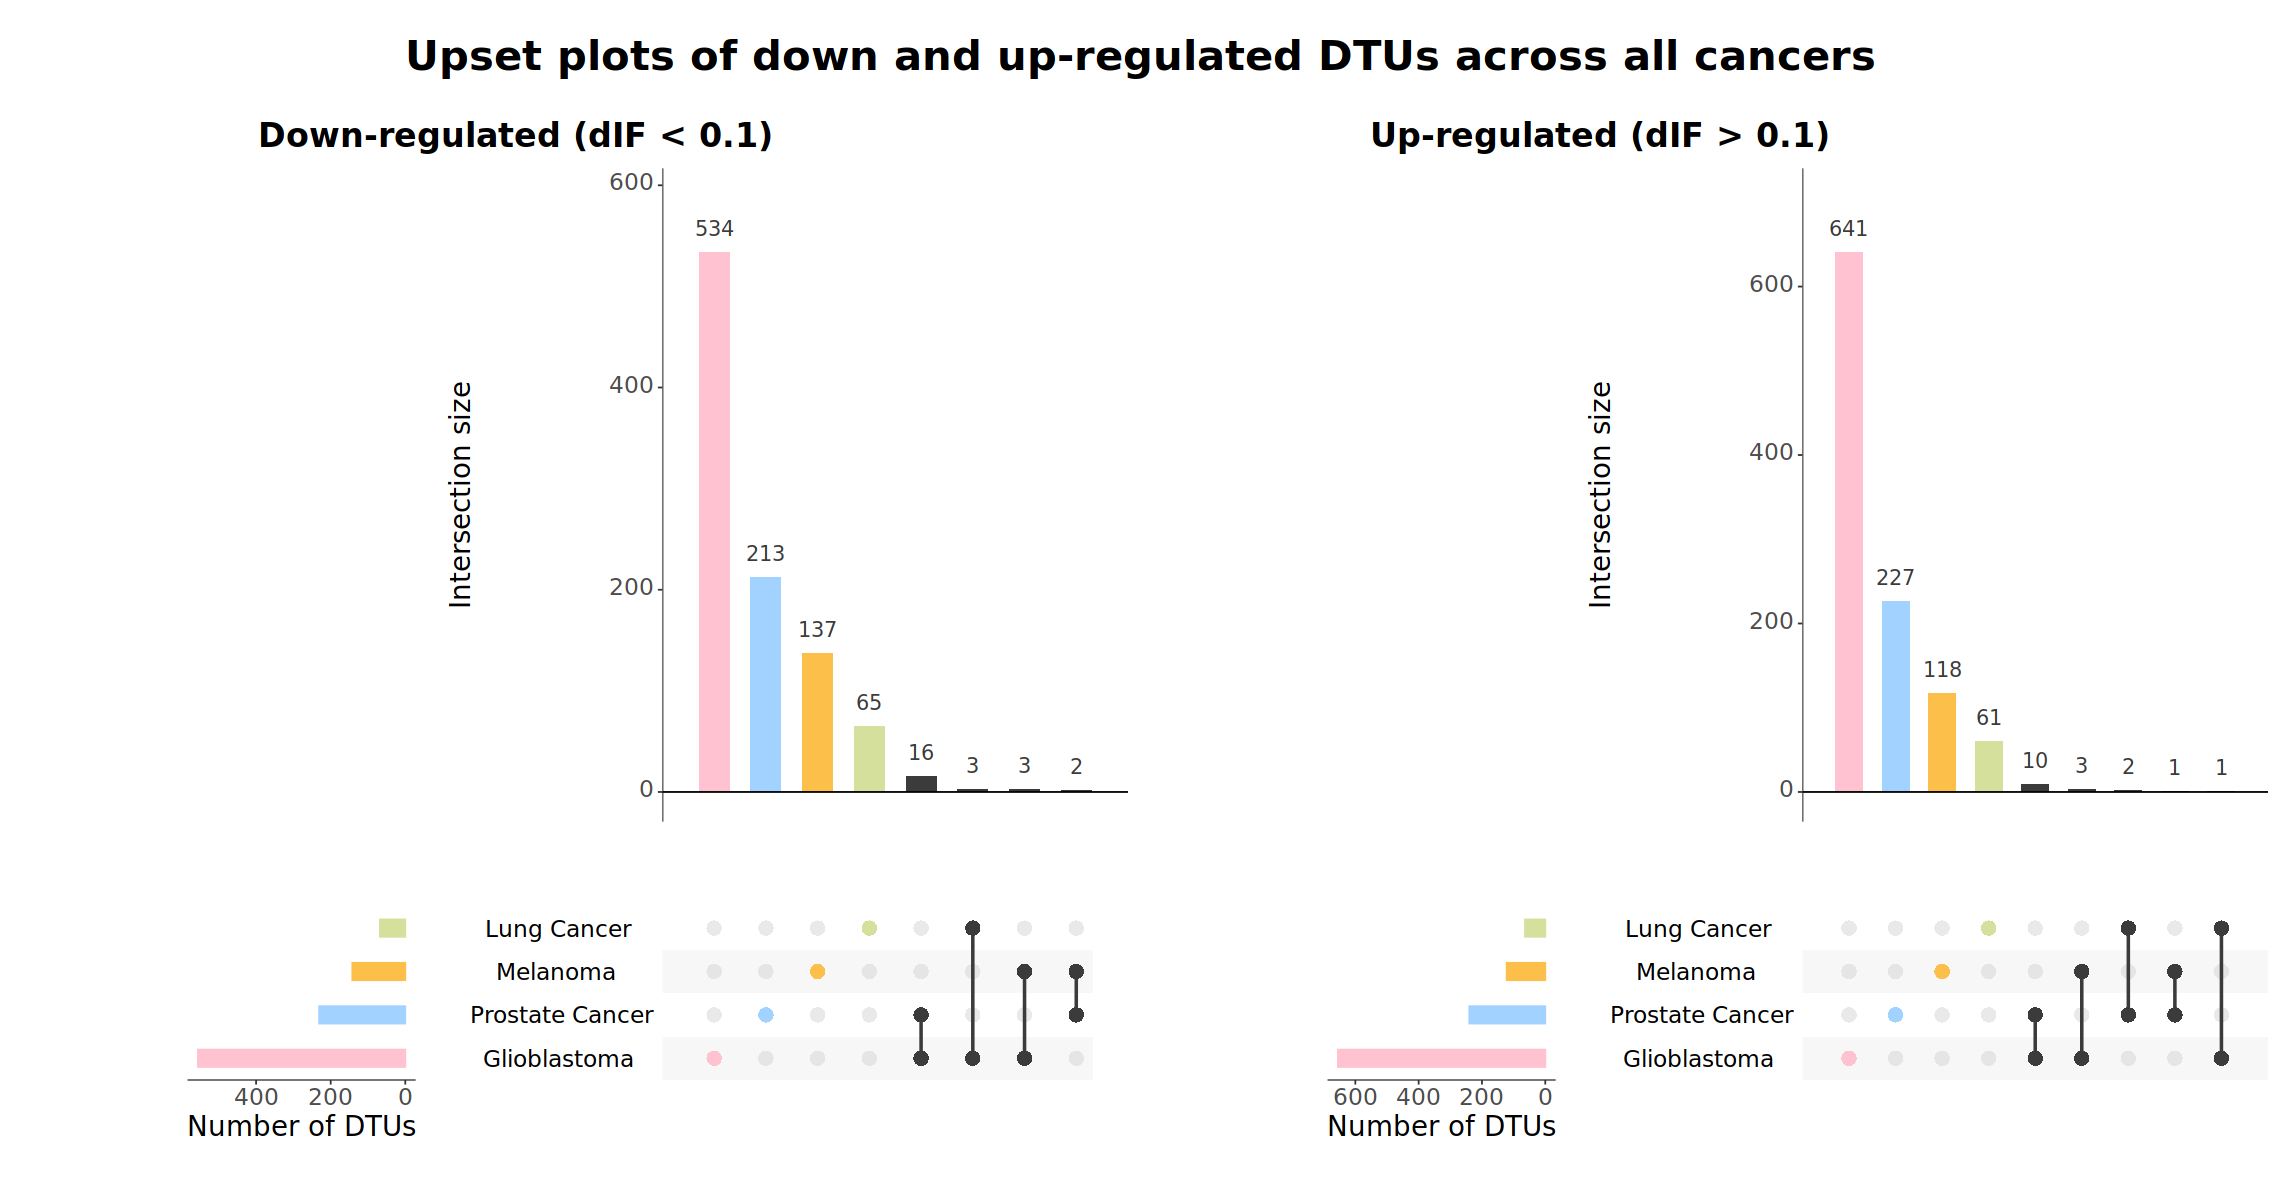

In [53]:
prow1 <- cowplot::plot_grid(NULL, p1$Main_bar, p1$Sizes, p1$Matrix,
    nrow=2, ncol=2, align='hv',rel_heights = c(10,3.5),
    rel_widths = c(4, 6)) + theme(plot.margin = unit(c(1, 0, 1, -10), "cm"))
prow2 <- cowplot::plot_grid(NULL, p2$Main_bar, p2$Sizes, p2$Matrix,
    nrow=2, ncol=2, align='hv', rel_heights = c(10, 3.5),
    rel_widths = c(4, 6))  + theme(plot.margin = unit(c(1, 0, 1, -1), "cm"))


options(repr.plot.width=19, repr.plot.height=10)

prow <- plot_grid(prow1, prow2, ncol=2, align="hv",
    labels = c("Down-regulated (dIF < 0.1)", "Up-regulated (dIF > 0.1)"),
    rel_widths=c(1,1),vjust=1.5, hjust=-0.5,label_size = 20)
title <- ggdraw() + draw_label("Upset plots of down and up-regulated DTUs across all cancers", fontface='bold', size=25)
#pdf(paste("/groups/dog/stage/enora/isoformswitch/plots/upsets_plots", ".pdf", sep = ""), width = 19, height =10)
plot_grid(title, prow, nrow=2, rel_heights=c(0.1,1))
#dev.off()

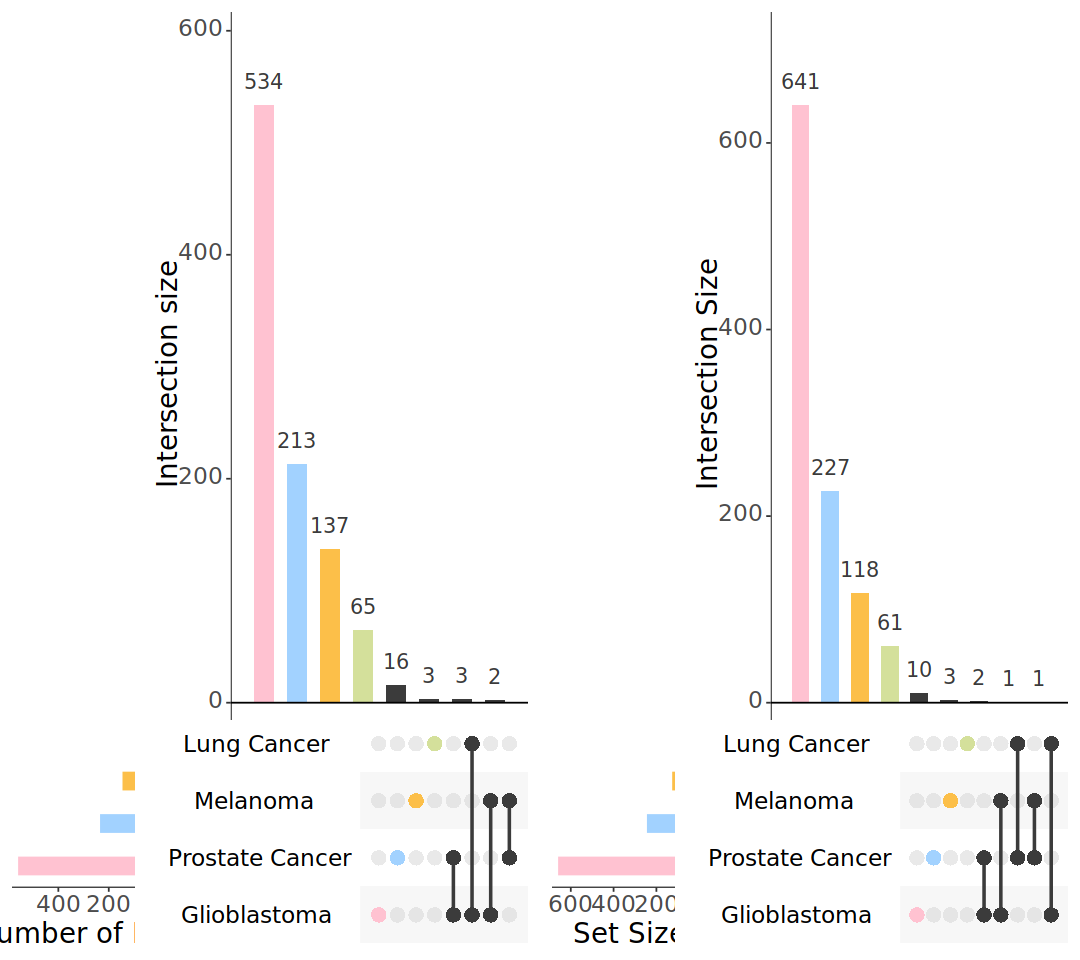

In [58]:
#plot_grid(p1, p2, ncol = 2)
#prow <- plot_grid(p1+ theme(legend.position="none"), p2 + theme(legend.position="none"), p3 + theme(legend.position="none"), align = 'vh', hjust = -1, nrow = 1)
#legend <- get_legend(p3 + theme(legend.box.margin = margin(0, 0, 0, 3), legend.title = element_text(size=18, face="bold", hjust=0.5), legend.text = element_text(size=18), legend.position = "bottom"))
#prow2 <- plot_grid(prow, legend, nrow=2, rel_heights=c(0.1, 0.01, 0.1, 0.1))
prow <- plot_grid(prow1, prow2, ncol=2, rel_heights=c(0.1, 0.01, 0.1, 0.1))
prow
#title <- ggdraw() + draw_label("Number of isoforms and genes through IsoformSwitchAnalyzeR", fontface='bold', size=25)
##pdf(paste("/groups/dog/stage/enora/isoformswitch/plots/counts_cancer", ".pdf", sep = ""), width = 15, height = 8)
#plot_grid(title, prow2, nrow=2, rel_heights=c(0.1, 0.7,0.4,0.1))
#dev.off()

### Viualization of SwitchList

In [ ]:
SwitchList

In [ ]:
isoforms = SwitchList$isoformFeatures[!duplicated(SwitchList$isoformFeatures$isoform_id), ]

In [ ]:
biotypes_total <- data.frame(table(isoforms$iso_biotype))
colnames(biotypes_total) <- c('biotype', 'frequency')
biotypes_total$biotype <- factor(biotypes_total$biotype, levels = biotypes_total$biotype[order(biotypes_total$frequency)])

In [ ]:
ggplot(data=biotypes_total, aes(x=biotype, y=frequency, fill=biotype)) +
  geom_bar(stat="identity") +
  coord_flip() +
  #scale_fill_brewer(palette="Pastel") +
  geom_text(
    aes(label = frequency), position = position_stack(vjust = 0.5), size=3) +
  scale_fill_hue(direction=-1) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle=90),
    legend.position="none")
  

In [4]:
SwitchList <- readRDS(file = "SwitchList_lncrna_resist.Rds")

## Glioblastoma

### Load Data

### Visualization

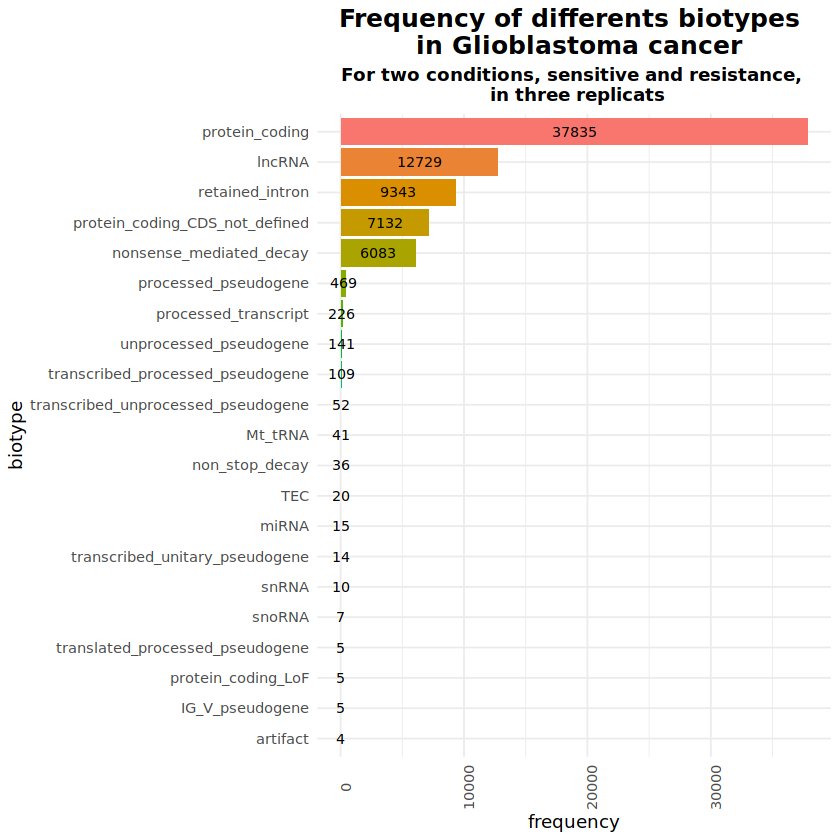

In [6]:
isoformsGB = subsetSwitchGB$isoformFeatures[!duplicated(subsetSwitchGB$isoformFeatures$isoform_id), ]
biotypes_GB <- data.frame(table(isoformsGB$iso_biotype))
colnames(biotypes_GB) <- c('biotype', 'frequency')
biotypes_GB$biotype <- factor(biotypes_GB$biotype, levels = biotypes_GB$biotype[order(biotypes_GB$frequency)])

ggplot(data=biotypes_GB, aes(x=biotype, y=frequency, fill=biotype)) +
  geom_bar(stat="identity") +
  coord_flip() +
  #scale_fill_brewer(palette="Pastel") +
  geom_text(
    aes(label = frequency), position = position_stack(vjust = 0.5), size=3) +
  scale_fill_hue(direction=-1) +
  labs(
    title="Frequency of differents biotypes \n in Glioblastoma cancer",
    subtitle="For two conditions, sensitive and resistance, \n in three replicats") +
  theme_minimal() +
  theme(
    legend.position="none",
    axis.text.x = element_text(angle=90),
    plot.title=element_text(
      size=15L,
      face="bold",
      hjust=0.5
      ),
    plot.subtitle=element_text(
      size=11L,
      face="bold",
      hjust=0.5
      )
    )   

#### DEXSeq

In [ ]:
subsetSwitchGB

### Sashimi Plot & Boxplot

Sélection des données DE 

In [9]:
isoformsGB= as.data.frame(subsetSwitchGB_DE$isoformFeatures[
    abs(subsetSwitchGB_DE$isoformFeatures$dIF) > 0.1 &
    subsetSwitchGB_DE$isoformFeatures$isoform_switch_q_value < 0.05,
    c(3,4,27, 28,29) ])
exonsGB= as.data.frame(subsetSwitchGB_DE$exons)
allGB = merge(isoformsGB,exonsGB, by="isoform_id")

#### Diagramme de Venn

In [10]:
library(VennDiagram)

Loading required package: grid

Loading required package: futile.logger



In [14]:
genesAurore = read.csv("/groups/dog/nanopore/lncrna_resist_cgo/secondary/5_DE/up_down_DEG_deseq2_allCancers_padj0.05_LFC1.csv")
genesAuroreGB = genesAurore[genesAurore$cancer=="glioblastoma",]
genesAuroreGB <- genesAuroreGB$geneID
genesGB = (unique(subsetSwitchGB_DE$isoformFeatures$gene_id))
x <- list(IsoformSwitchAnalyzeR = genesGB, DESeq2 =genesAuroreGB)

In [12]:
genesAuroreGB[genesAuroreGB$geneID %like% "ENSG00000235453",]

geneID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,seqnames,start,end,strand,gene_name,gene_biotype,gene_annot,CAGEvalid,filter,cancer
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [15]:
venn.diagram(
    x = list(genesGB,genesAuroreGB),
    filename = "VennDiagram.png",
    disable.logging = TRUE,
    height = 30, 
    width = 30,
    units = "cm",
    resolution = 500,
    imagetype="png",
    compression = "lzw",
    main = "Venn Diagram of DE genes from Glioblastoma samples",
    sub = "Comparing two different methods of differential expression",
    main.fontfamily = "sans",
    main.cex = 2,
    sub.cex = 1.5,
    category.names = c("DESeq2", "DEXSeq"),
    lwd = 1, 
    col=c("#4c956c", "#0077b6"),
    fill = c(alpha("#2dc653",0.3), alpha('#0077b6',0.3)),
    cex = 1.5,
    fontfamily = "sans",
    cat.cex = 2,
    cat.default.pos = "outer",
    cat.fontfamily = "sans",
    cat.dist = c(0.15, 0.15),
    cat.col = c("#0077b6", "#4c956c"),
    scaled = FALSE,
    output = FALSE,
    print.mode =c("raw", "percent")
)

INFO [2023-03-08 14:14:15] $x
INFO [2023-03-08 14:14:15] list(genesGB, genesAuroreGB)
INFO [2023-03-08 14:14:15] 
INFO [2023-03-08 14:14:15] $filename
INFO [2023-03-08 14:14:15] [1] "VennDiagram.png"
INFO [2023-03-08 14:14:15] 
INFO [2023-03-08 14:14:15] $disable.logging
INFO [2023-03-08 14:14:15] [1] TRUE
INFO [2023-03-08 14:14:15] 
INFO [2023-03-08 14:14:15] $height
INFO [2023-03-08 14:14:15] [1] 30
INFO [2023-03-08 14:14:15] 
INFO [2023-03-08 14:14:15] $width
INFO [2023-03-08 14:14:15] [1] 30
INFO [2023-03-08 14:14:15] 
INFO [2023-03-08 14:14:15] $units
INFO [2023-03-08 14:14:15] [1] "cm"
INFO [2023-03-08 14:14:15] 
INFO [2023-03-08 14:14:15] $resolution
INFO [2023-03-08 14:14:15] [1] 500
INFO [2023-03-08 14:14:15] 
INFO [2023-03-08 14:14:15] $imagetype
INFO [2023-03-08 14:14:15] [1] "png"
INFO [2023-03-08 14:14:15] 
INFO [2023-03-08 14:14:15] $compression
INFO [2023-03-08 14:14:15] [1] "lzw"
INFO [2023-03-08 14:14:15] 
INFO [2023-03-08 14:14:15] $main
INFO [2023-03-08 14:14:15] [1]

[1] 1

![Venn Diagram](/groups/dog/stage/enora/isoformswitch/VennDiagram.png)

Sélection de l'isoforme le plus DE (alpha min, abs(dIF) max)

In [42]:
isoformsGB[isoformsGB$isoform_switch_q_value == min(isoformsGB$isoform_switch_q_value),]

,isoform_id,gene_id,dIF,isoform_switch_q_value,gene_switch_q_value
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
173520,ENST00000692500,ENSG00000235453,-0.9493333,3.965338e-138,3.965338e-138


Visualisation de cet isoforme dans le tableau, puis des autres isoformes du gène associé :

In [43]:
subsetSwitchGB_DE$isoformFeatures[subsetSwitchGB_DE$isoformFeatures$isoform_id == "ENST00000692500",]
subsetSwitchGB_DE$isoformFeatures[subsetSwitchGB_DE$isoformFeatures$gene_id == "ENSG00000235453",]

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
173520,isoComp_00173520,geneComp_00025445,ENST00000692500,ENSG00000235453,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,protein_coding,46.73379,⋯,2.557007e-08,-12.71826,NA,0.6371208,0.9493333,0,-0.9493333,3.965338e-138,3.965338e-138,FALSE


,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
173514,isoComp_00173514,geneComp_00025445,ENST00000425533,ENSG00000235453,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,nonsense_mediated_decay,46.73379,⋯,4.532292e-01,1.120143,NA,0.01709583,0.004600000,0.03556667,0.030966667,7.979944e-01,3.965338e-138,TRUE
173515,isoComp_00173515,geneComp_00025445,ENST00000450093,ENSG00000235453,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,protein_coding,46.73379,⋯,2.227626e+00,10.529101,NA,0.19984167,0.000000000,0.60290000,0.602900000,2.435196e-65,3.965338e-138,FALSE
173517,isoComp_00173517,geneComp_00025445,ENST00000453396,ENSG00000235453,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,protein_coding,46.73379,⋯,6.578709e-01,5.361399,NA,0.11055417,0.002066667,0.30186667,0.299800000,1.434913e-64,3.965338e-138,FALSE
173519,isoComp_00173519,geneComp_00025445,ENST00000644531,ENSG00000235453,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,protein_coding,46.73379,⋯,1.965616e-01,-1.217607,NA,0.02333333,0.035000000,0.04276667,0.007766667,6.055170e-01,3.965338e-138,FALSE
173520,isoComp_00173520,geneComp_00025445,ENST00000692500,ENSG00000235453,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,protein_coding,46.73379,⋯,2.557007e-08,-12.718261,NA,0.63712083,0.949333333,0.00000000,-0.949333333,3.965338e-138,3.965338e-138,FALSE


In [44]:
subsetSwitchGB_DE

This switchAnalyzeRlist list contains:
 5830 isoforms from 842 genes
 1 comparison from 2 conditions (in total 6 samples)

Switching features:
                                        Comparison Isoforms Switches Genes
1 glioblastoma_sensitive vs glioblastoma_resistant     1211      980   842

Feature analyzed:
[1] "Isoform Switch Identification, ORFs, ntSequence"

In [48]:
bestgene = isoformsGB[isoformsGB$gene_id == "ENSG00000235453",]
exonsBestGene = exonsGB[exonsGB$isoform_id %in% bestgene$isoform_id, ]

In [49]:
exonsBestGene

,seqnames,start,end,width,strand,isoform_id,gene_id,gene_name
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>,<lgl>
85325,chr9,32551144,32551693,550,+,ENST00000453396,ENSG00000235453,NA
85326,chr9,32551676,32551807,132,+,ENST00000450093,ENSG00000235453,NA
85327,chr9,32552234,32552479,246,+,ENST00000450093,ENSG00000235453,NA
85328,chr9,32552234,32552479,246,+,ENST00000453396,ENSG00000235453,NA
85329,chr9,32552327,32552479,153,+,ENST00000692500,ENSG00000235453,NA
85334,chr9,32552801,32553007,207,+,ENST00000450093,ENSG00000235453,NA
85335,chr9,32552801,32553007,207,+,ENST00000453396,ENSG00000235453,NA
85336,chr9,32552801,32553007,207,+,ENST00000692500,ENSG00000235453,NA


#### Boxplot

In [45]:
counts = subsetSwitchGB$isoformCountMatrix[subsetSwitchGB$isoformCountMatrix$isoform_id %in% bestgene$isoform_id,]
U251_R = t(counts[,c(2,3,4)])

tab1 = counts[,c(1,2)]
tab2 = counts[,c(1,3)]
tab3 = counts[,c(1,4)]
tab4 = counts[,c(1,5)]
tab5 = counts[,c(1,6)]
tab6 = counts[,c(1,7)]

resistant = c("tab1", "tab2", "tab3")
sensitive = c("tab4", "tab5", "tab6")
for (df in c(resistant, sensitive)){
    df.tmp <- get(df)
    if (df %in% resistant){
        names(df.tmp) <- c("isoform_id", "U251_R")
    }
    else{
        names(df.tmp) <- c("isoform_id", "U251_S")
    }
    assign(df, df.tmp)
}

tab = cbind(rbind(tab1, tab2, tab3), rbind(tab4, tab5, tab6))
tab = tab[,-3]

Warning message:
"Continuous limits supplied to discrete scale.
ℹ Did you mean `limits = factor(...)` or `scale_*_continuous()`?"
Warning message:
"Continuous limits supplied to discrete scale.
ℹ Did you mean `limits = factor(...)` or `scale_*_continuous()`?"
Warning message:
"Continuous limits supplied to discrete scale.
ℹ Did you mean `limits = factor(...)` or `scale_*_continuous()`?"


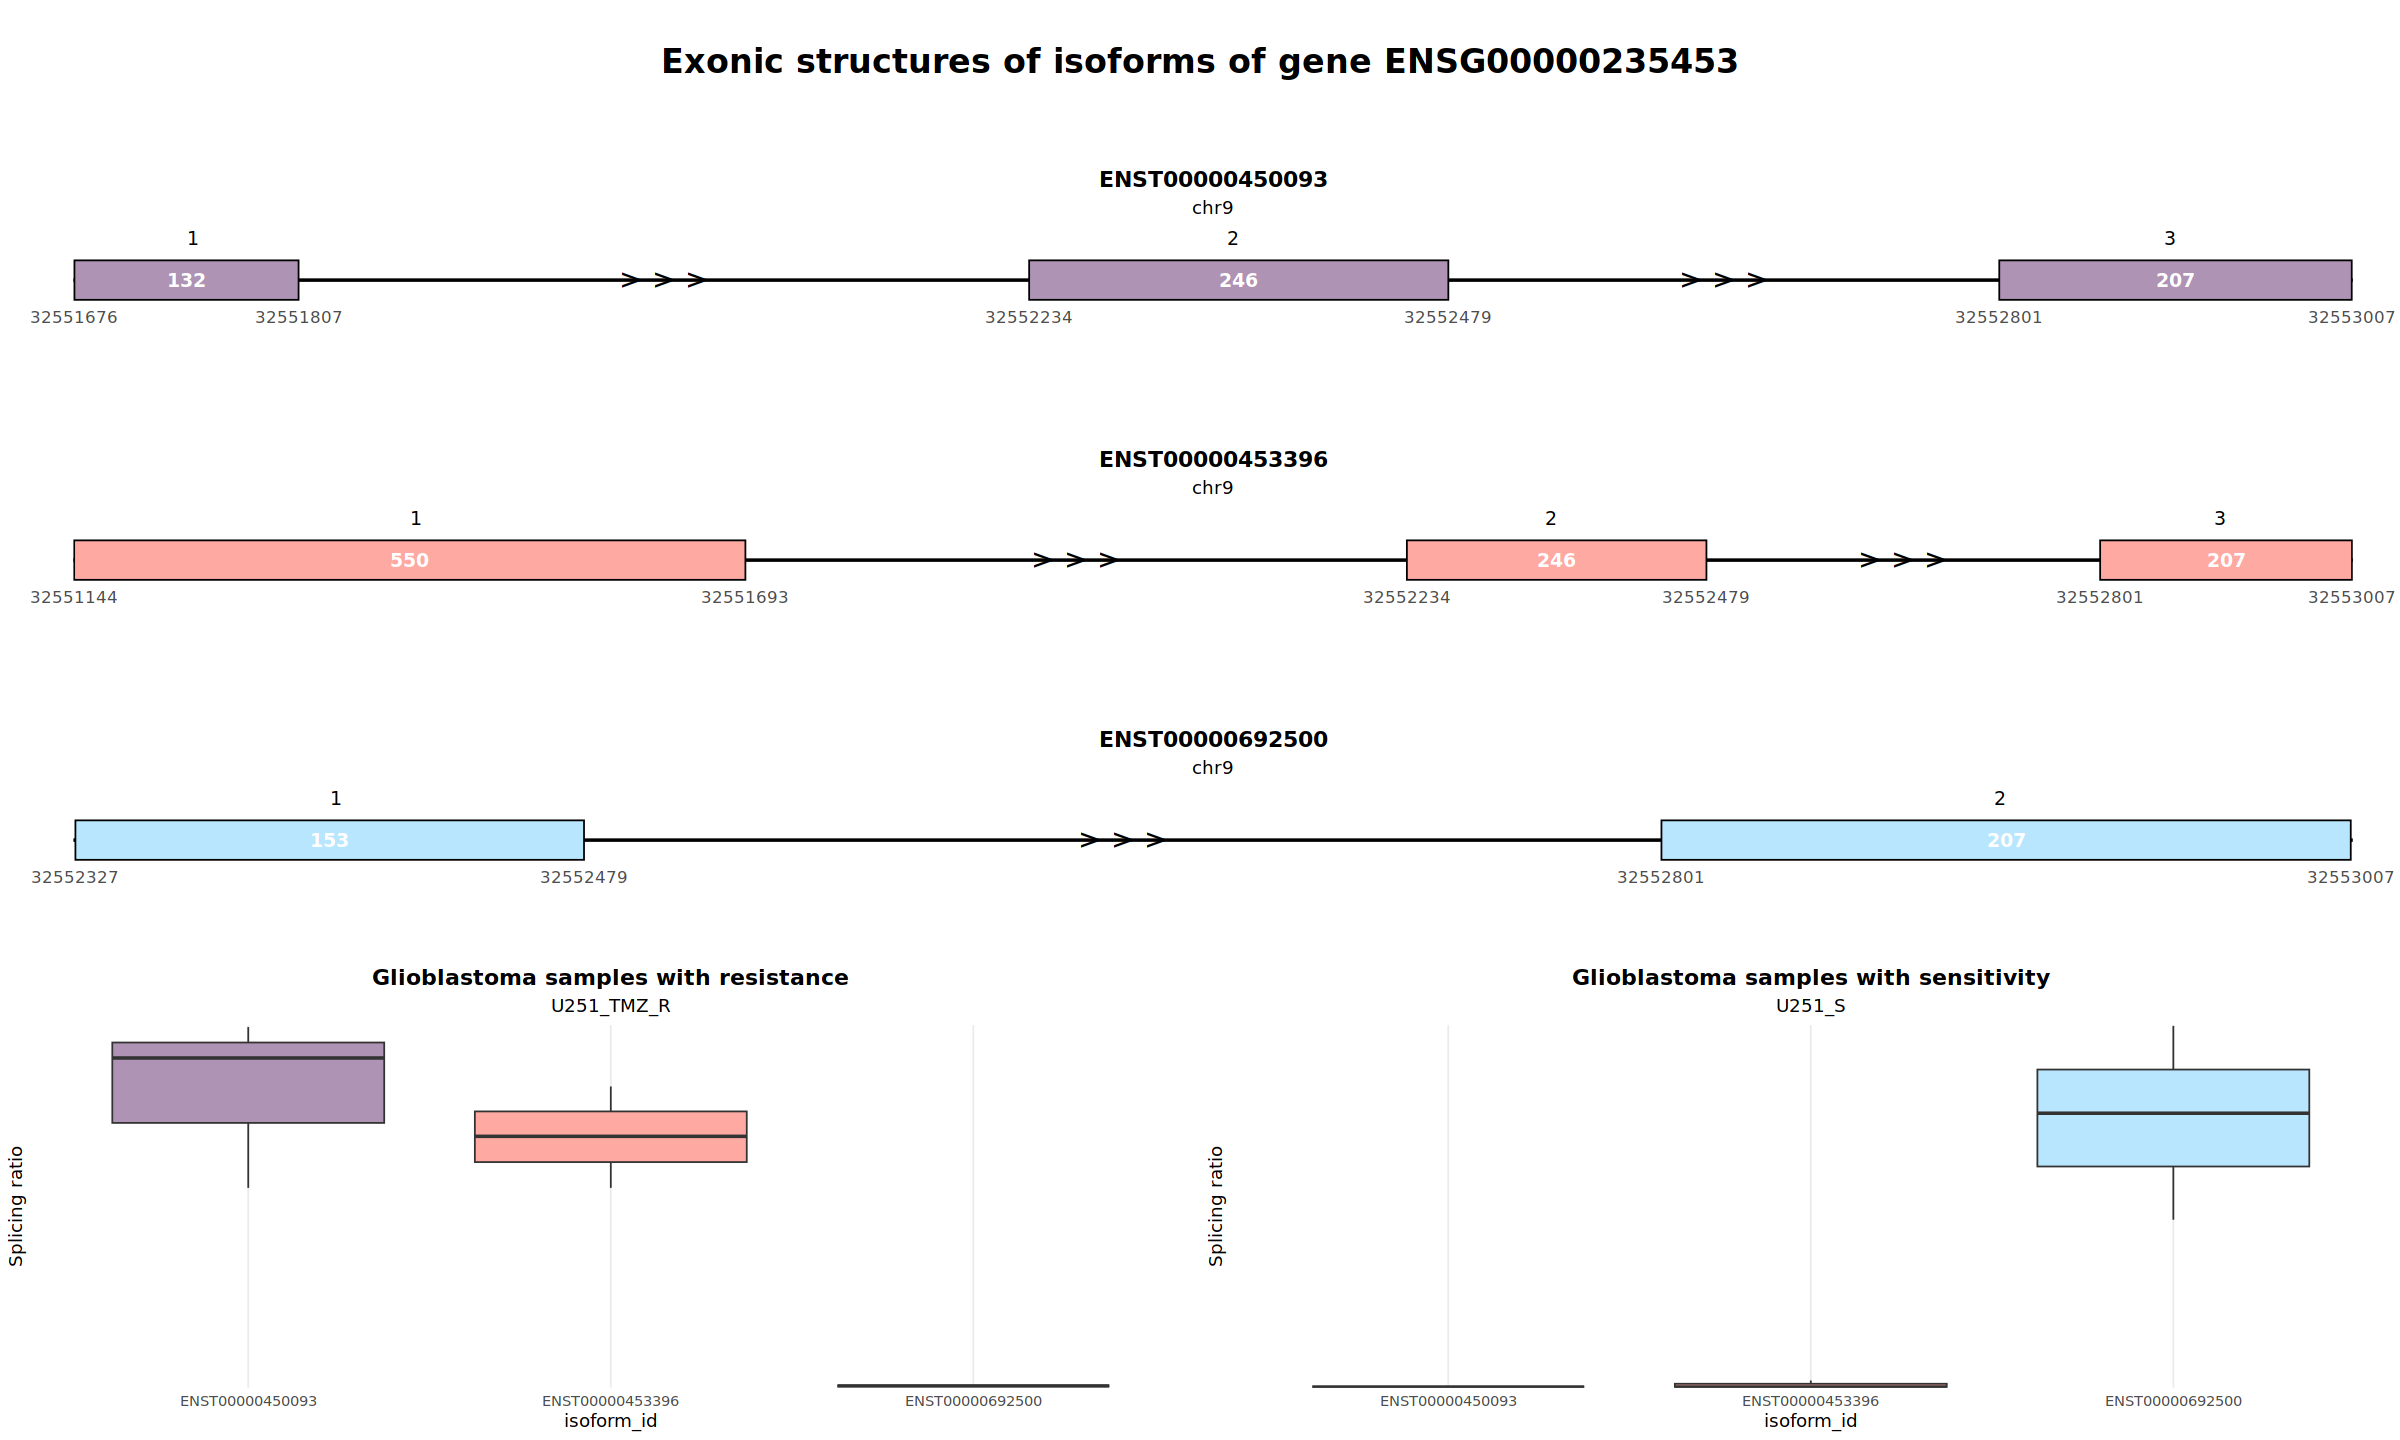

In [47]:
source("/groups/dog/stage/enora/IsoPlotR_package/R/IsoPlotR.r")
isoplot <- plot_iso(exonsBestGene, output="/groups/dog/stage/enora/isoformswitch/iso")
boxplotR <- 
  ggplot(tab) +
  aes(x =isoform_id , y = U251_R, fill=isoform_id) +
  scale_y_discrete(name ="Splicing ratio")+
  geom_boxplot(fill=c("#AF93B4", "#FFA9A3", "#B9E6FF")) +
  #scale_fill_brewer(fill=c("#AF93B4", "#FFA9A3", "#B9E6FF")) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5)) +
  labs(title = "Glioblastoma samples with resistance", subtitle = "U251_TMZ_R")

boxplotS <- 
  ggplot(tab) +
  aes(x =isoform_id , y = U251_S, fill=isoform_id) +
  scale_y_discrete(name ="Splicing ratio")+
  geom_boxplot(fill=c("#AF93B4", "#FFA9A3", "#B9E6FF")) +
  #scale_fill_brewer(fill=c("#AF93B4", "#FFA9A3", "#B9E6FF")) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5)) +
  labs(title = "Glioblastoma samples with sensitivity", subtitle = "U251_S")

plots <- list(boxplotR, boxplotS)
iso <- plot_grid(plotlist=isoplot, ncol=1)
boxplot <- plot_grid(plotlist=plots, ncol=2)

title <- ggdraw() + draw_label(paste0("Exonic structures of isoforms of gene ENSG00000235453" ), fontface='bold', size=20)
#options(repr.plot.width=20, repr.plot.height=12)

#
plot_grid( title, iso, boxplot, ncol=1,  rel_heights=c(0.1, 0.7,0.4,0.1)) # rel_heights values control title margins
#isoplot

SASHIMI PLOT

Définition de la plage 

In [ ]:
unique(exonsBestGene$seqnames)
min(exonsBestGene$start)
max(exonsBestGene$end)

Utilisation de **ggsashimi** : package python à utiliser en ligne de commande comme ceci :

`ggsashimi.py -b input_bams.tsv -c chr9:32552327-32553007 -g /groups/dog/nanopore/lncrna_resist_cgo/secondary/1_annexa/results/final/extended_annotations.full.gtf -C 1 -O 1 --shrink --fix-y-scale --alpha 0.25 --base-size=20 --ann-height=4 --height=3 --width=18 -o sashimi3 -F png`

* **-b** *input_bams.tsv* : fichier au format tsv contenant les chemins vers les fichiers bam pour les échantillons du GB

* **-c** *chr9:32552327-32553007* : coordonnées génomiques de la plage du sashimi plot avec le chromosome, le start puis le stop

* **-g** */groups/dog/nanopore/lncrna_resist_cgo/../extended_annotations.full.gtf* : chemin vers le fichier gtf de l'annotation

* **-C** *1* et **-O** *1* : colonne à sélectionner dans input_bams.tsv pour regrouper les samples (par condition (Resistant VS Sensitive) ou pour chacun des 6 échantillons)

* autres arguments : options pour le graphique

![Sashimi Plot for Glioblastoma samples, Sensitive vs Resistant](/groups/dog/stage/enora/isoformswitch/sashimi/sashimi3.png)

![Sashimi Plot for Glioblastoma samples, Sensitive vs Resistant](/groups/dog/stage/enora/isoformswitch/sashimi/sashimi4.png)

### Analyzing Open Reading Frames

In [ ]:
"orfAnalysis" %in% names( subsetSwitchGB )

In [3]:
subsetSwitchGB <- analyzeNovelIsoformORF(
    switchAnalyzeRlist=subsetSwitchGB,
    analysisAllIsoformsWithoutORF=TRUE
)

Step 0 of 4 : Extracting CDS from already annotated isoforms...

Step 1 of 4 : Identifying overlap between supplied CDS and isoforms

Step 2 of 4 : Extracting transcript sequences...

Step 3 of 4 : Locating potential ORFs...



  |======================================================================| 100%


Step 4 of 4 : Scanning for PTCs...

1891 putative ORFs were identified, analyzed and added.

Done



### Extracting Nucleotide and Amino Acid Sequences

In [5]:
subsetSwitchGB <- extractSequence(
    switchAnalyzeRlist=subsetSwitchGB,
    genomeObject  = NULL, # Only necessary if sequences have not already been extracted
    onlySwitchingGenes = TRUE, # whether the only sequences from transcripts in genes with significant switching isoforms should be extracted
    alpha = 0.05,
    dIFcutoff = 0.1,
    extractNTseq = TRUE, # whether the nucleotide sequence of the transcripts should be extracted
    extractAAseq = TRUE, # whether the amino acid (AA) sequence of the annotated open reading frames (ORF) should be extracted
    removeShortAAseq = TRUE, # whether to remove sequences based on their length, AA sequences are filtered to be > 5 AA.
    removeLongAAseq = FALSE, # whether to removesequences based on their length, AA sequences are filtered to be < 1000 AA
    alsoSplitFastaFile = FALSE,
    removeORFwithStop=TRUE, # whether ORFs containing stop codons removed from the ORF annotation in the switchAnalyzeRlist & removed from the sequences added to the switchAnalyzeRlist and/or written to fasta files  
    addToSwitchAnalyzeRlist = TRUE, # whether the extracted sequences should be added to the switchAnalyzeRlist
    writeToFile = TRUE, # whether the extracted sequence(s) should be exported to (separate) fasta files 
    pathToOutput = getwd(),
    outputPrefix='Glioblastoma-switchList',
    forceReExtraction = FALSE,
    quiet=FALSE
)

Step 1 of 3 : Extracting transcript nucleotide sequences...

Step 2 of 3 : Extracting ORF AA sequences...

Step 3 of 3 : Preparing output...

The 'removeLongAAseq' and 'removeShortAAseq' arguments:
 Removed : 5 isoforms.
 Trimmed : 0 isoforms (to only contain the first 1000 AA)

Done



In [ ]:
head(subsetSwitchGB$ntSequence,2)

In [ ]:
head(subsetSwitchGB$aaSequence,2)

### Predicting Alternative Splicing

In [ ]:
subsetSwitchGB <- analyzeAlternativeSplicing(
    switchAnalyzeRlist=subsetSwitchGB,
    onlySwitchingGenes=TRUE,
    alpha=0.05,
    dIFcutoff = 0.1,
    showProgress=TRUE,
    quiet=TRUE
)

In [ ]:
table( subsetSwitchGB$AlternativeSplicingAnalysis$IR )

In [ ]:
IR <- as.data.frame(table( subsetSwitchGB$AlternativeSplicingAnalysis$IR ))

In [ ]:
colnames(IR) <- c("IR", "Isoforms")

In [ ]:
ggplot(data=IR) +
aes(x=IR, y=Isoforms, fill=IR) +
  geom_col() +
  scale_fill_brewer(palette = "Pastel2") +
  #scale_fill_brewer(palette="Pastel") +
  geom_text(
    aes(label = Isoforms), position = position_stack(vjust = 0.5), size=3) +
  #scale_fill_hue(direction=-1) +
  labs(
    title="Number of intron retentions in Glioblastoma samples "
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(
      size=10L,
      face="bold",
      hjust=0.5
      ),
    axis.text.x = element_text(angle=0),
    legend.position="none")

### Predicting Switch Consequences

#### Args

The arguments passed to consequencesToAnalyze must be a combination of :

* **all** : Test transcripts for any of the differences described below ;

* **Transcrips arguments** : 

    * **tss** : Test transcripts for whether they use different Transcription Start Site (TSS) ;

    * **tts** : Test transcripts for whether they use different Transcription Termination Site (TTS) ; 

    * **last_exon** : Test whether transcripts utilizes different last exons (defined as the last exon of each transcript is non-overlapping) ;

    * **isoform_length** : Test transcripts for differences in isoform length ;

    * **exon_number** : Test transcripts for differences in exon number ;

    * **intron_structure** : Test transcripts for differences in intron structure, e.g. usage of exon-exon junctions. This analysis corresponds to analyzing whether all introns in one isoform is also found in the other isoforms ;

    * **intron_retention** : Test for differences in intron retentions (and their genomic positions). *Require that **analyzeIntronRetention()** have been run* ;

    * **isoform_class_code** : Test transcripts for differences in the transcript classification provide by cufflinks. For a updated list of class codes see http://cole-trapnell-lab.github.io/cufflinks/cuffcompare/#transfrag-class-codes.

* **CPAT arguments** :

    * **coding_potential** : Test transcripts for differences in coding potential, as indicated by the CPAT or CPC2 analysis. *Requires that **analyzeCPAT()** or **analyzeCPC2()** have been used to add external conding potential analysis to the switchAnalyzeRlist*.

* **ORF arguments** :  Requires that least one of the isoforms are annotated with an ORF either via **identifyORF()** or by supplying a GTF file and settingaddAnnotatedORFs=TRUE when creating the switchAnalyzeRlist :

    * **NMD_status** : Test transcripts for differences in sensitivity to Nonsense Mediated Decay (NMD) ;

    * **ORF_genomic** : Test transcripts for differences in genomic position of the Open Reading Frames (ORF) ;

    * **ORF_length** : Test transcripts for differences in length of Open Reading Frames (ORF) ;

    * **5_utr_length** : Test transcripts for differences in the length of the 5’ UnTranslated Region (UTR). The 5’UTR is defined as the region from the transcript start to the ORF start ;

    * **3_utr_length** : Test transcripts for differences in the length of the 3’ UnTranslated Regions (UTR). The 3’UTR is defined as the region from the end of the ORF to the transcript end.

* **Sequence similarity arguments**

    * **5_utr_seq_similarity** : Test whether the isoform nucleotide sequences of the 5’ UnTranslated Region (UTR) are different (as described above). The 5’UTR is defined as the region from the transcript start to the ORF start. Reported as different if the measured JCsim is smaller than ntJCsimCutoff and the length difference of the aligned and combined region is larger than ntCutoff. Requires that both the isoforms are annotated with an ORF either via identifyORF or by supplying a GTF file and setting addAnnotatedORFs=TRUE when creating the switchAnalyzeRlist ;

    * **3_utr_seq_similarity** : Test whether the isoform nucleotide sequences of the 3’ UnTranslated Region (UTR) are different (as described above). The 3’UTR is defined as the region from the end of the ORF to the transcript end. Reported as different if the measured JCsim is smaller than ntJCsimCutoff and the length difference of the aligned and combined region is larger than ntCutoff. Requires that both the isoforms are annotated with a ORF either via identifyORF or by supplying a GTF file and setting addAnnotatedORFs=TRUE when creating the switchAnalyzeRlist ;

    * **isoform_seq_similarity** : Test whether the isoform nucleotide sequences are different (as described above) ;

    * **ORF_seq_similarity** : Test whether the amino acid sequences of the ORFs are different (as described above) ;

* **PFAM arguments** : Requires that both the isoforms are annotated with a ORF either via **identifyORF()** or by supplying a GTF file and setting addAnnotatedORFs=TRUE when creating the switchAnalyzeRlist & that **analyzePFAM()** have been used to add external Pfam analysis to the switchAnalyzeRlist

    * **domains_identified** : Test transcripts for differences in the name and order of which domains are identified by the Pfam in the transcripts ;

    * **domain_length** : Test transcripts for differences in the length of overlapping domains of the same type (same hmm_name) thereby enabling analysis of protein domain truncation ;

    * **genomic_domain_position** : Test transcripts for differences in the genomic position of the domains identified by the Pfam analysis (Will be different unless the two isoforms have the same domains at the same genomic location).

* **SignalIP arguments** : Requires that **analyzeSignalP()** have been used to add external SignalP analysis to the switchAnalyzeRlist & that both the isoforms are annotated with a ORF either via **analyzeOR()F** or by supplying a GTF file and setting addAnnotatedORFs=TRUE when creating the switchAnalyzeRlist (and are thereby also affected by removeNoncodinORFs=TRUE in analyzeCPAT)
    
    * **signal_peptide_identified** : Test transcripts for differences in whether a signal peptide was identified or not by the SignalP analysis.

* **IDR arguments :**

    * **IDR_identified** : Test for differences in isoform IDRs. Specifically the two isoforms are analyzed for whether they contain IDRs which do not overlap in genomic coordinates. *Requires analyzeSwitchConsequences that **analyzeNetSurfP2()** or **analyzeIUPred2A()** have been used to add external IDR analysis to the switchAnalyzeRlist* ;

    * **IDR_length** : Test for differences in the length of overlapping (in genomic coordinates) IDRs. *Requires that **analyzeNetSurfP2()** or **analyzeIUPred2A()** have been used to add external IDR analysis* ;

    * **IDR_type** : Test for differences in IDR type. Specifically the two isoforms are tested for overlapping IDRs (genomic coordinates) and overlapping IDRs are compared with regards to their IDR type (IDR vs IDR w binding site). *Only available if **analyzeIUPred2A()** was used to add external IDR analysis to the switchAnalyzeRlist* ;

* **Sub cell arguments :**

    * **sub_cell_location** ;
        
    * **solubility_status**.

#### Function

In [7]:
consequencesOfInterest <- c('tss',
            'tts',
            'last_exon',
            'isoform_length',
            'exon_number',
            'intron_structure',
            'intron_retention',
            'isoform_class_code',
            # ORF
            'ORF_genomic',
            'ORF_length',
            '5_utr_length',
            '3_utr_length',
            # seq similarity
            'isoform_seq_similarity',
            'ORF_seq_similarity',
            #'5_utr_seq_similarity',
            '3_utr_seq_similarity',
            # ORF
            'NMD_status'
            )
subsetSwitchGB <- analyzeSwitchConsequences(
    subsetSwitchGB,
    consequencesToAnalyze = consequencesOfInterest,
    dIFcutoff = 0.1, # very high cutoff for fast runtimes - you should use the default (0.1)
    showProgress=TRUE
)


Step 1 of 4: Extracting genes with isoform switches...

Step 2 of 4: Analyzing 980 pairwise isoforms comparisons...



  |======================================================================| 100%


Step 3 of 4: Massaging isoforms comparisons results...

Step 4 of 4: Preparing output...

Identified  genes with containing isoforms switching with functional consequences...



In [3]:
subsetSwitchGB <- readRDS(file = "subsetSwitchGB-2_lncrna_resist.Rds")

In [6]:
extractSwitchSummary(
    subsetSwitchGB, 
    alpha = 0.05,
    dIFcutoff = 0.1, 
    onlySigIsoforms = FALSE, # whether to only consider significant isoforms, meaning only analyzing genes where at least two isoforms which both have significant usage changes in opposite direction 
    includeCombined = TRUE, # whether a combined summary across all comparisons should also be made 
    filterForConsequences = FALSE # whether to filter for genes with functional consequences
) 
extractSwitchSummary(
    subsetSwitchGB, 
    dIFcutoff = 0.1, 
    filterForConsequences = TRUE
)

Comparison,nrIsoforms,nrSwitches,nrGenes
<chr>,<int>,<int>,<int>
glioblastoma_sensitive vs glioblastoma_resistant,1211,980,842
Combined,1211,980,842


Comparison,nrIsoforms,nrSwitches,nrGenes
<chr>,<int>,<int>,<int>
glioblastoma_sensitive vs glioblastoma_resistant,1208,977,839


In [7]:
options(repr.plot.width=20, repr.plot.height=12)
consequenceSummary <- extractConsequenceSummary(
    subsetSwitchGB,
    includeCombined = TRUE,
    returnResult = TRUE,        # return data.frame with summary
    plot=FALSE,
    removeEmptyConsequences = TRUE,
    plotGenes = TRUE            # plot summary
)

In [8]:
consequenceSummary

Comparison,featureCompared,switchConsequence,nrGenesWithConsequences,nrIsoWithConsequences
<chr>,<chr>,<chr>,<int>,<int>
glioblastoma_sensitive vs glioblastoma_resistant,3 utr length,3UTR is longer,209,292
glioblastoma_sensitive vs glioblastoma_resistant,3 utr seq similarity,3UTR is longer,195,275
glioblastoma_sensitive vs glioblastoma_resistant,3 utr length,3UTR is shorter,296,421
glioblastoma_sensitive vs glioblastoma_resistant,3 utr seq similarity,3UTR is shorter,283,397
glioblastoma_sensitive vs glioblastoma_resistant,5 utr length,5UTR is longer,236,337
glioblastoma_sensitive vs glioblastoma_resistant,5 utr length,5UTR is shorter,240,346
glioblastoma_sensitive vs glioblastoma_resistant,Combined,any consequence,831,1196
glioblastoma_sensitive vs glioblastoma_resistant,ORF length,Complete ORF gain,79,103
glioblastoma_sensitive vs glioblastoma_resistant,ORF seq similarity,Complete ORF gain,79,103


In [9]:
palette = c(
    '#85AE5B', # green
    '#adc178', # olive
    '#5C9EC1', # blue sky
    '#ade8f4', # baby blue
    '#e7c6ff', # lavander
    '#ffc2d1', # pink
    '#EB9784', # coral
    '#A7333F', # red
    '#C44536', # persian red
    '#f79d65', # orange
    '#F4B266', # ocre
    '#F6D379',  # yellow
    '#F2B79F',
    '#B6A6CA',
    '#006633'
)

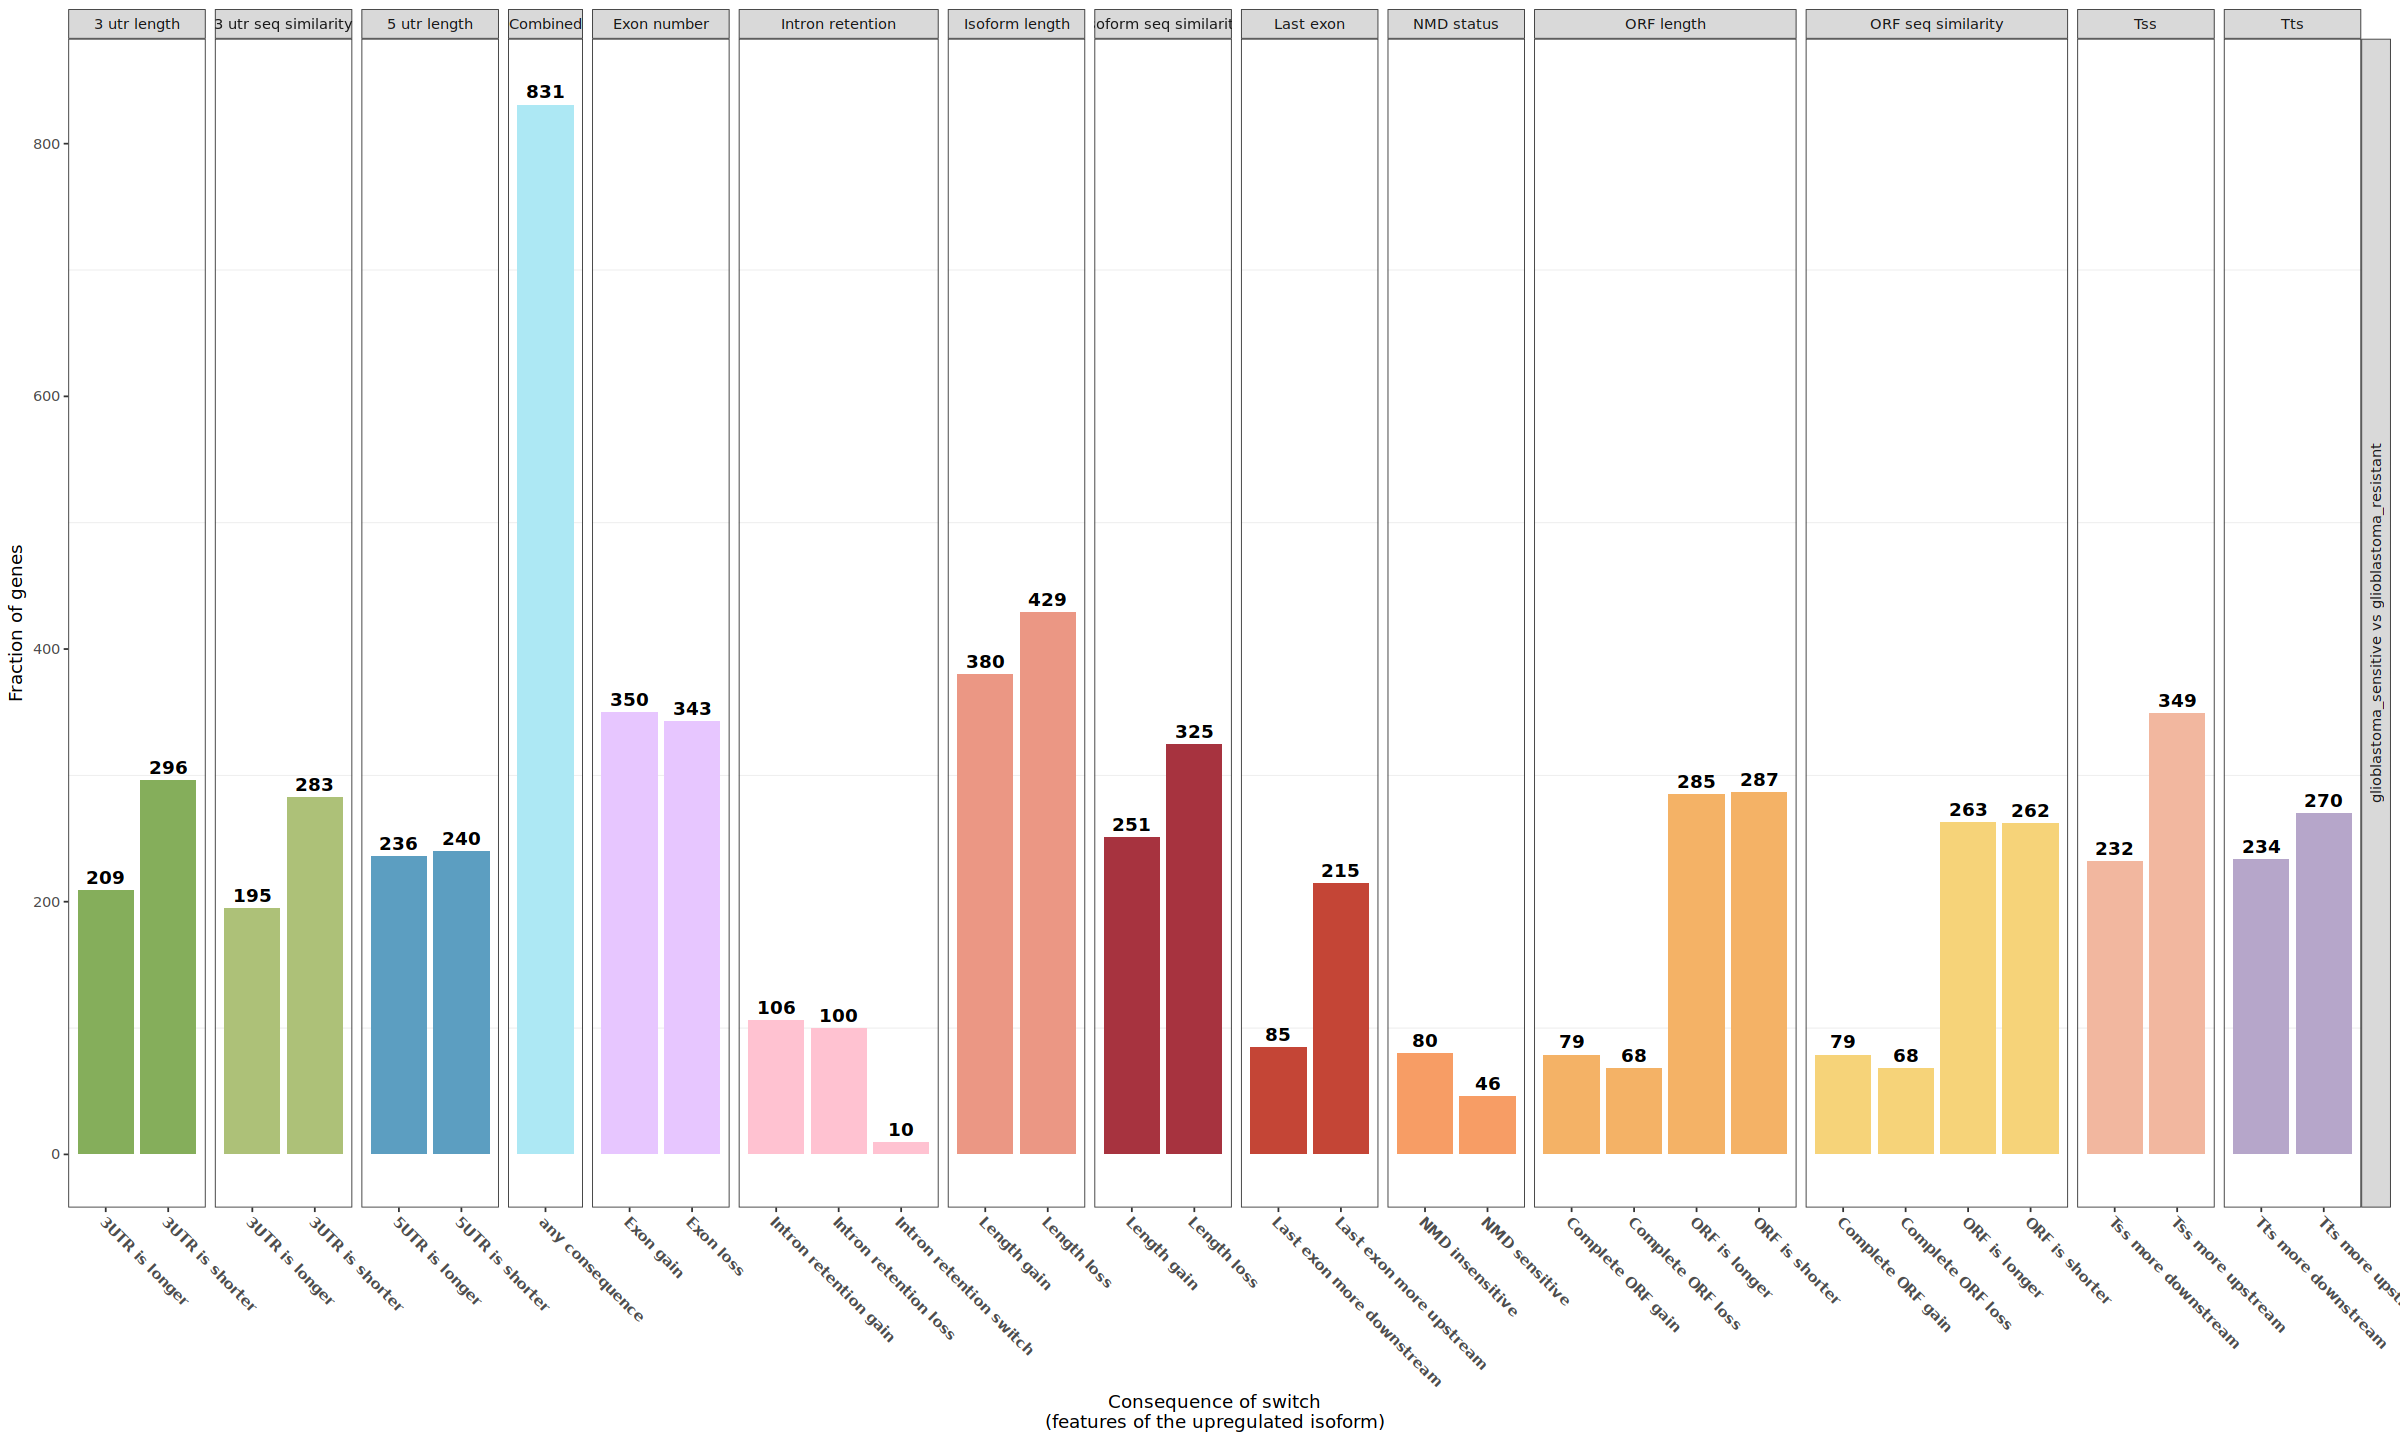

In [10]:
g1 <- ggplot(
    consequenceSummary, 
    aes(
        x = switchConsequence,
        fill = featureCompared,
        y = nrGenesWithConsequences
        )
    ) +
labs(
    x = 'Consequence of switch\n(features of the upregulated isoform)',
    y = 'Fraction of genes'
)
g1 <- g1 + 
        geom_bar(stat = "identity") + 
          geom_text(
            aes(
                label = nrGenesWithConsequences,
                y = nrGenesWithConsequences + 10
                ),
            #position = position_dodge(0.9),
            angle = 0,
            color = 'black',
            fontface = "bold",
            vjust = 0.5
        ) +
        scale_fill_manual(
            values = palette
            ) +
        facet_grid(
            Comparison ~ featureCompared,
            scales = 'free',
            space = 'free_x') +
        theme_bw() +
        #theme(panel.border = element_blank()),
        theme(
            panel.grid.major = element_blank(),
            #panel.grid.minor = element_blank(),
            strip.text.y = element_text(angle = 90),
            legend.position = "none",
            axis.text.x = element_text(
                face = "bold",
                angle = -45,
                hjust = 0,
                vjust = 1
                )
            )
g1

### Post Analysis of Isoform Switches with Consequences

Now switches are analyzed we can also extract the the largest/most significant switches with the extractTopSwitch() function


Extract top 10 switching genes (by q-value)

In [37]:
extractTopSwitches(
    subsetSwitchGB,
    filterForConsequences = TRUE,
    n = 10,
    extractGenes = TRUE,
    sortByQvals = TRUE
)

,gene_ref,gene_id,gene_name,condition_1,condition_2,gene_switch_q_value,switchConsequencesGene,Rank
,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<lgl>,<int>
1,geneComp_00025445,ENSG00000235453,NA,glioblastoma_sensitive,glioblastoma_resistant,3.951854e-138,TRUE,1
2,geneComp_00005136,ENSG00000123472,NA,glioblastoma_sensitive,glioblastoma_resistant,1.987025e-86,TRUE,2
3,geneComp_00010485,ENSG00000163682,NA,glioblastoma_sensitive,glioblastoma_resistant,3.576351e-85,TRUE,3
4,geneComp_00007718,ENSG00000141510,NA,glioblastoma_sensitive,glioblastoma_resistant,4.988903e-82,TRUE,4
5,geneComp_00011889,ENSG00000169689,NA,glioblastoma_sensitive,glioblastoma_resistant,6.817204e-47,TRUE,5
6,geneComp_00003056,ENSG00000105835,NA,glioblastoma_sensitive,glioblastoma_resistant,1.571780e-45,TRUE,6
7,geneComp_00001331,ENSG00000077254,NA,glioblastoma_sensitive,glioblastoma_resistant,5.383425e-41,TRUE,7
8,geneComp_00010444,ENSG00000163565,NA,glioblastoma_sensitive,glioblastoma_resistant,3.262330e-40,TRUE,8
9,geneComp_00000400,ENSG00000022267,NA,glioblastoma_sensitive,glioblastoma_resistant,3.357039e-40,TRUE,9


Extract top 10 switching isoforms (by q-value)

In [36]:
extractTopSwitches(
    subsetSwitchGB,
    filterForConsequences = TRUE,
    n = 10,
    extractGenes = FALSE,
    sortByQvals = TRUE
)

iso_ref,gene_ref,isoform_id,gene_id,gene_name,condition_1,condition_2,IF1,IF2,dIF,isoform_switch_q_value,switchConsequencesGene,Rank
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>
isoComp_00173520,geneComp_00025445,ENST00000692500,ENSG00000235453,NA,glioblastoma_sensitive,glioblastoma_resistant,0.949,0.000,-0.949,3.951854e-138,TRUE,1
isoComp_00055671,geneComp_00005136,ENST00000574428,ENSG00000123472,NA,glioblastoma_sensitive,glioblastoma_resistant,0.414,0.164,-0.250,1.987025e-86,TRUE,2
isoComp_00106102,geneComp_00010485,ENST00000645496,ENSG00000163682,NA,glioblastoma_sensitive,glioblastoma_resistant,0.140,0.030,-0.109,3.576351e-85,TRUE,3
isoComp_00106090,geneComp_00010485,ENST00000295955,ENSG00000163682,NA,glioblastoma_sensitive,glioblastoma_resistant,0.789,0.918,0.129,3.622110e-85,TRUE,4
isoComp_00080892,geneComp_00007718,ENST00000510385,ENSG00000141510,NA,glioblastoma_sensitive,glioblastoma_resistant,0.141,0.002,-0.139,4.988903e-82,TRUE,5
isoComp_00080901,geneComp_00007718,ENST00000618944,ENSG00000141510,NA,glioblastoma_sensitive,glioblastoma_resistant,0.141,0.002,-0.139,4.988903e-82,TRUE,6
isoComp_00173515,geneComp_00025445,ENST00000450093,ENSG00000235453,NA,glioblastoma_sensitive,glioblastoma_resistant,0.000,0.603,0.603,2.432669e-65,TRUE,7
isoComp_00173517,geneComp_00025445,ENST00000453396,ENSG00000235453,NA,glioblastoma_sensitive,glioblastoma_resistant,0.002,0.302,0.300,1.432624e-64,TRUE,8
isoComp_00118382,geneComp_00011889,ENST00000392359,ENSG00000169689,NA,glioblastoma_sensitive,glioblastoma_resistant,0.361,0.161,-0.199,6.817204e-47,TRUE,9


Extract top 10 switching isoforms (by dIF)

In [35]:
extractTopSwitches(
    subsetSwitchGB,
    filterForConsequences = TRUE,
    n = 10,
    extractGenes = FALSE,
    sortByQvals = FALSE
)

iso_ref,gene_ref,isoform_id,gene_id,gene_name,condition_1,condition_2,IF1,IF2,dIF,isoform_switch_q_value,switchConsequencesGene,Rank
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>
isoComp_00173520,geneComp_00025445,ENST00000692500,ENSG00000235453,NA,glioblastoma_sensitive,glioblastoma_resistant,0.949,0.000,-0.949,3.951854e-138,TRUE,1
isoComp_00197038,geneComp_00035677,ENST00000659685,ENSG00000267321,NA,glioblastoma_sensitive,glioblastoma_resistant,0.025,0.838,0.813,2.860046e-07,TRUE,2
isoComp_00197039,geneComp_00035677,ENST00000665667,ENSG00000267321,NA,glioblastoma_sensitive,glioblastoma_resistant,0.904,0.095,-0.809,1.518570e-08,TRUE,3
isoComp_00145207,geneComp_00015726,ENST00000360945,ENSG00000196860,NA,glioblastoma_sensitive,glioblastoma_resistant,1.000,0.279,-0.721,9.054914e-04,TRUE,4
isoComp_00145208,geneComp_00015726,ENST00000557754,ENSG00000196860,NA,glioblastoma_sensitive,glioblastoma_resistant,0.000,0.721,0.721,2.067244e-03,TRUE,5
isoComp_00191634,geneComp_00032928,ENST00000612612,ENSG00000259112,NA,glioblastoma_sensitive,glioblastoma_resistant,0.212,0.919,0.707,2.502761e-02,TRUE,6
isoComp_00107553,geneComp_00010631,tx.8303,ENSG00000164106,NA,glioblastoma_sensitive,glioblastoma_resistant,0.084,0.754,0.670,3.911948e-03,TRUE,7
isoComp_00209604,geneComp_00043105,ENST00000704381,ENSG00000290318,NA,glioblastoma_sensitive,glioblastoma_resistant,0.890,0.239,-0.650,8.570183e-07,TRUE,8
isoComp_00107551,geneComp_00010631,ENST00000296506,ENSG00000164106,NA,glioblastoma_sensitive,glioblastoma_resistant,0.875,0.246,-0.629,2.657386e-02,TRUE,9


In [4]:
switchingIso <- extractTopSwitches( 
    subsetSwitchGB, 
    filterForConsequences = TRUE, 
    n = NA,                  # n=NA: all features are returned
    extractGenes = FALSE,    # when FALSE isoforms are returned
    sortByQvals = TRUE
)

Warning message in .fun(piece, ...):
"Less than n genes with significant switches and consequences were found. Returning those."


In [10]:
subset(switchingIso, gene_id == 'ENSG00000235453')

,iso_ref,gene_ref,isoform_id,gene_id,gene_name,condition_1,condition_2,IF1,IF2,dIF,isoform_switch_q_value,switchConsequencesGene,Rank
,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>
1,isoComp_00173520,geneComp_00025445,ENST00000692500,ENSG00000235453,NA,glioblastoma_sensitive,glioblastoma_resistant,0.949,0.000,-0.949,3.951854e-138,TRUE,1
7,isoComp_00173515,geneComp_00025445,ENST00000450093,ENSG00000235453,NA,glioblastoma_sensitive,glioblastoma_resistant,0.000,0.603,0.603,2.432669e-65,TRUE,7
8,isoComp_00173517,geneComp_00025445,ENST00000453396,ENSG00000235453,NA,glioblastoma_sensitive,glioblastoma_resistant,0.002,0.302,0.300,1.432624e-64,TRUE,8


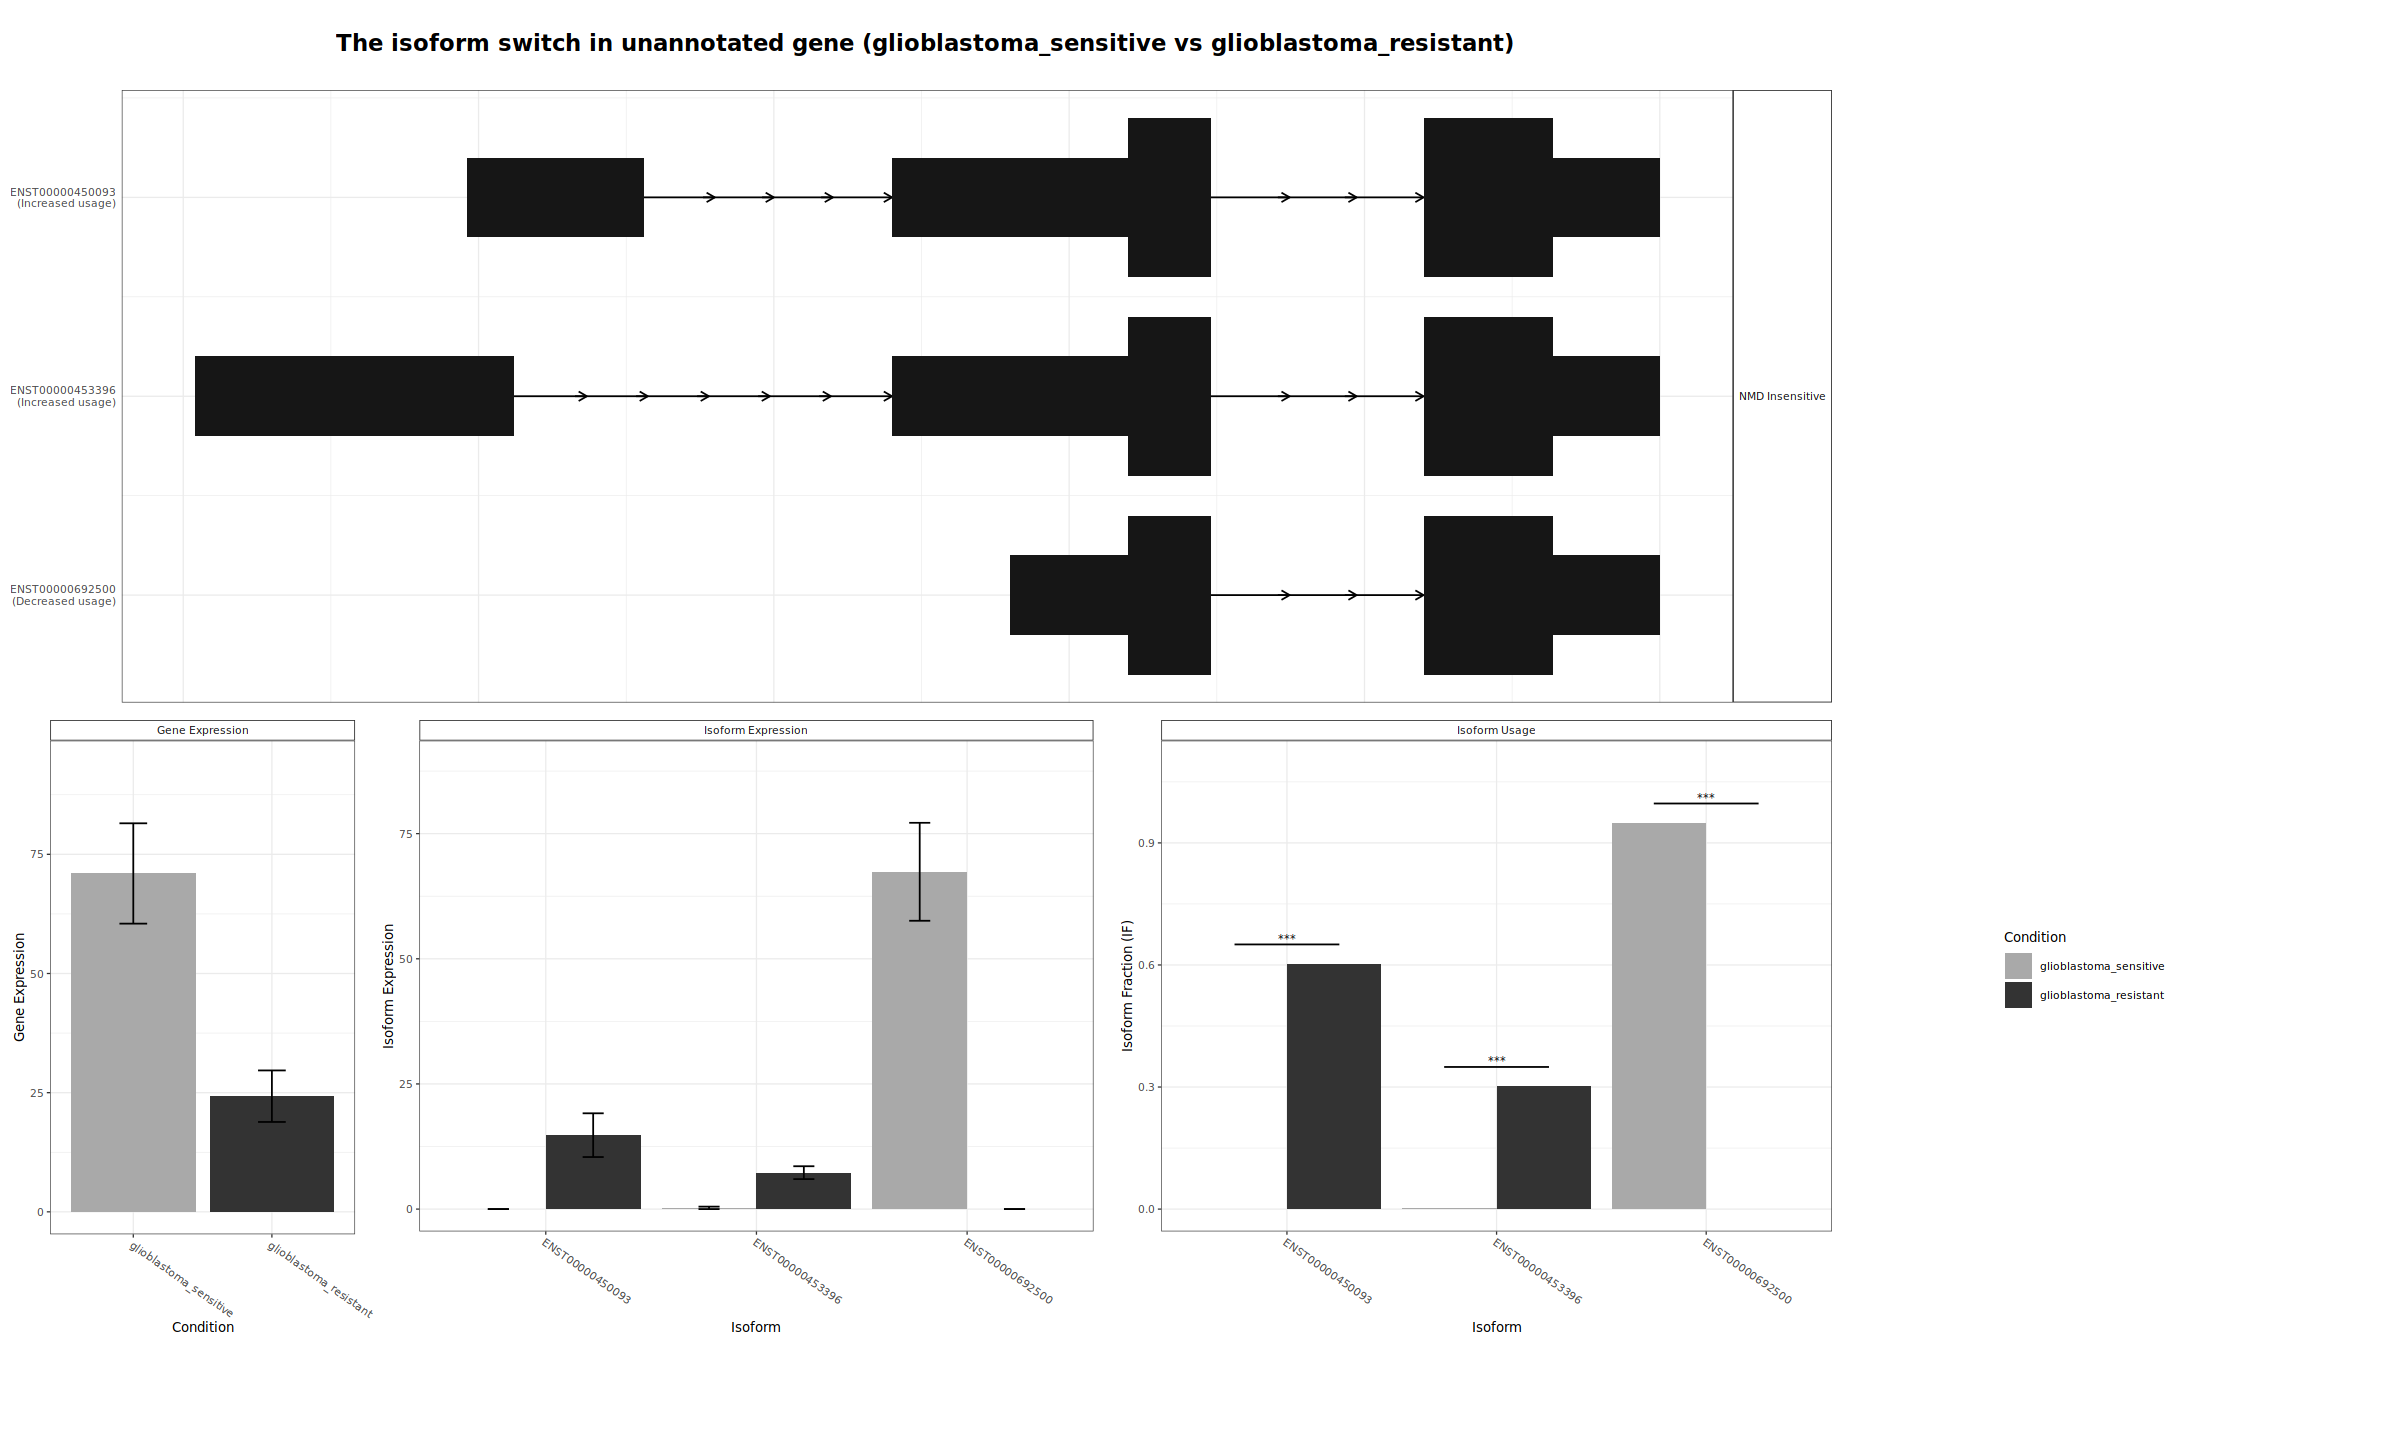

In [9]:
mostSwitchingGene <- extractTopSwitches(
    subsetSwitchGB,
    filterForConsequences = TRUE,
    n = 1
)

options(repr.plot.width=20, repr.plot.height=12)

switchPlot(
    switchAnalyzeRlist = subsetSwitchGB,
    gene = mostSwitchingGene$gene_id
)

In [19]:
options(repr.plot.width=20, repr.plot.height=12)

switchPlotTopSwitches(
    subsetSwitchGB,
    alpha = 0.05,
    dIFcutoff = 0.1,
    onlySigIsoforms = FALSE,
    n=Inf,
    sortByQvals=TRUE,
    filterForConsequences = TRUE, # whether to only plot gene with predicted consequences of the isoform switch
    pathToOutput = getwd(),
    splitComparison=TRUE,
    splitFunctionalConsequences = TRUE,
    IFcutoff=0.05,
    fileType = "png",
    additionalArguments=list(),
    quiet=FALSE
)

Extracting data...

Creating 839 plots...



  |                                                                      |   0%


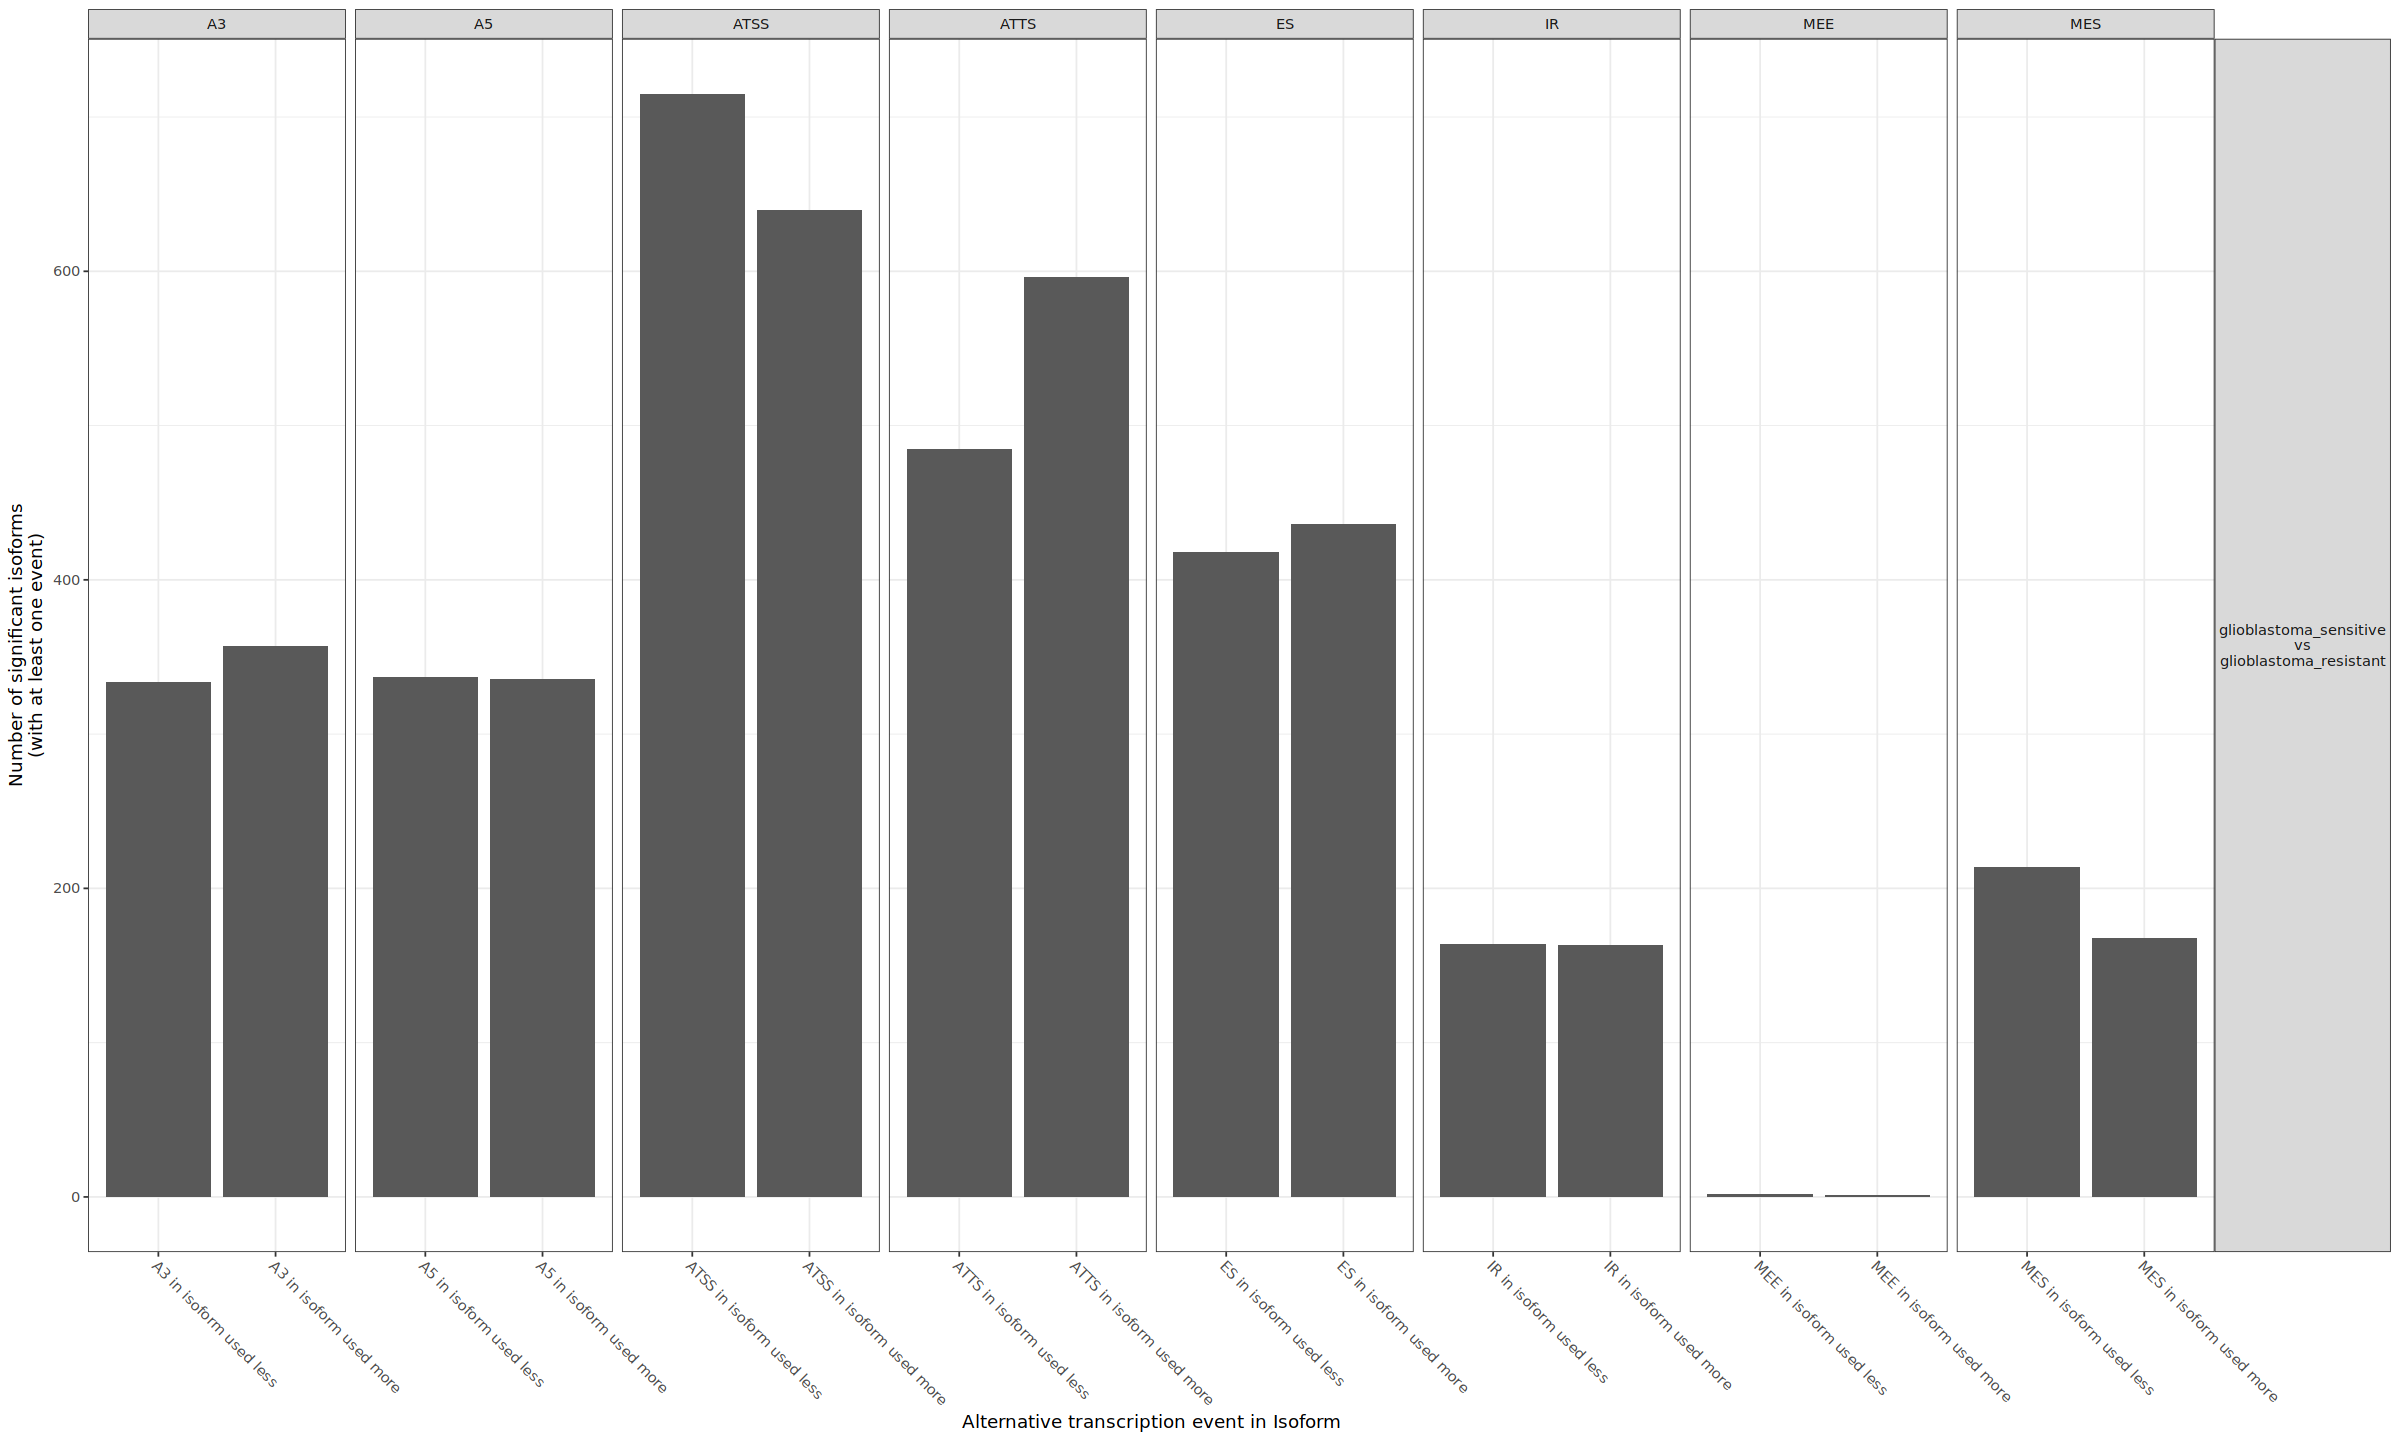

In [20]:
extractSplicingSummary(
    subsetSwitchGB,
    asFractionTotal = FALSE,
    plotGenes=FALSE
)

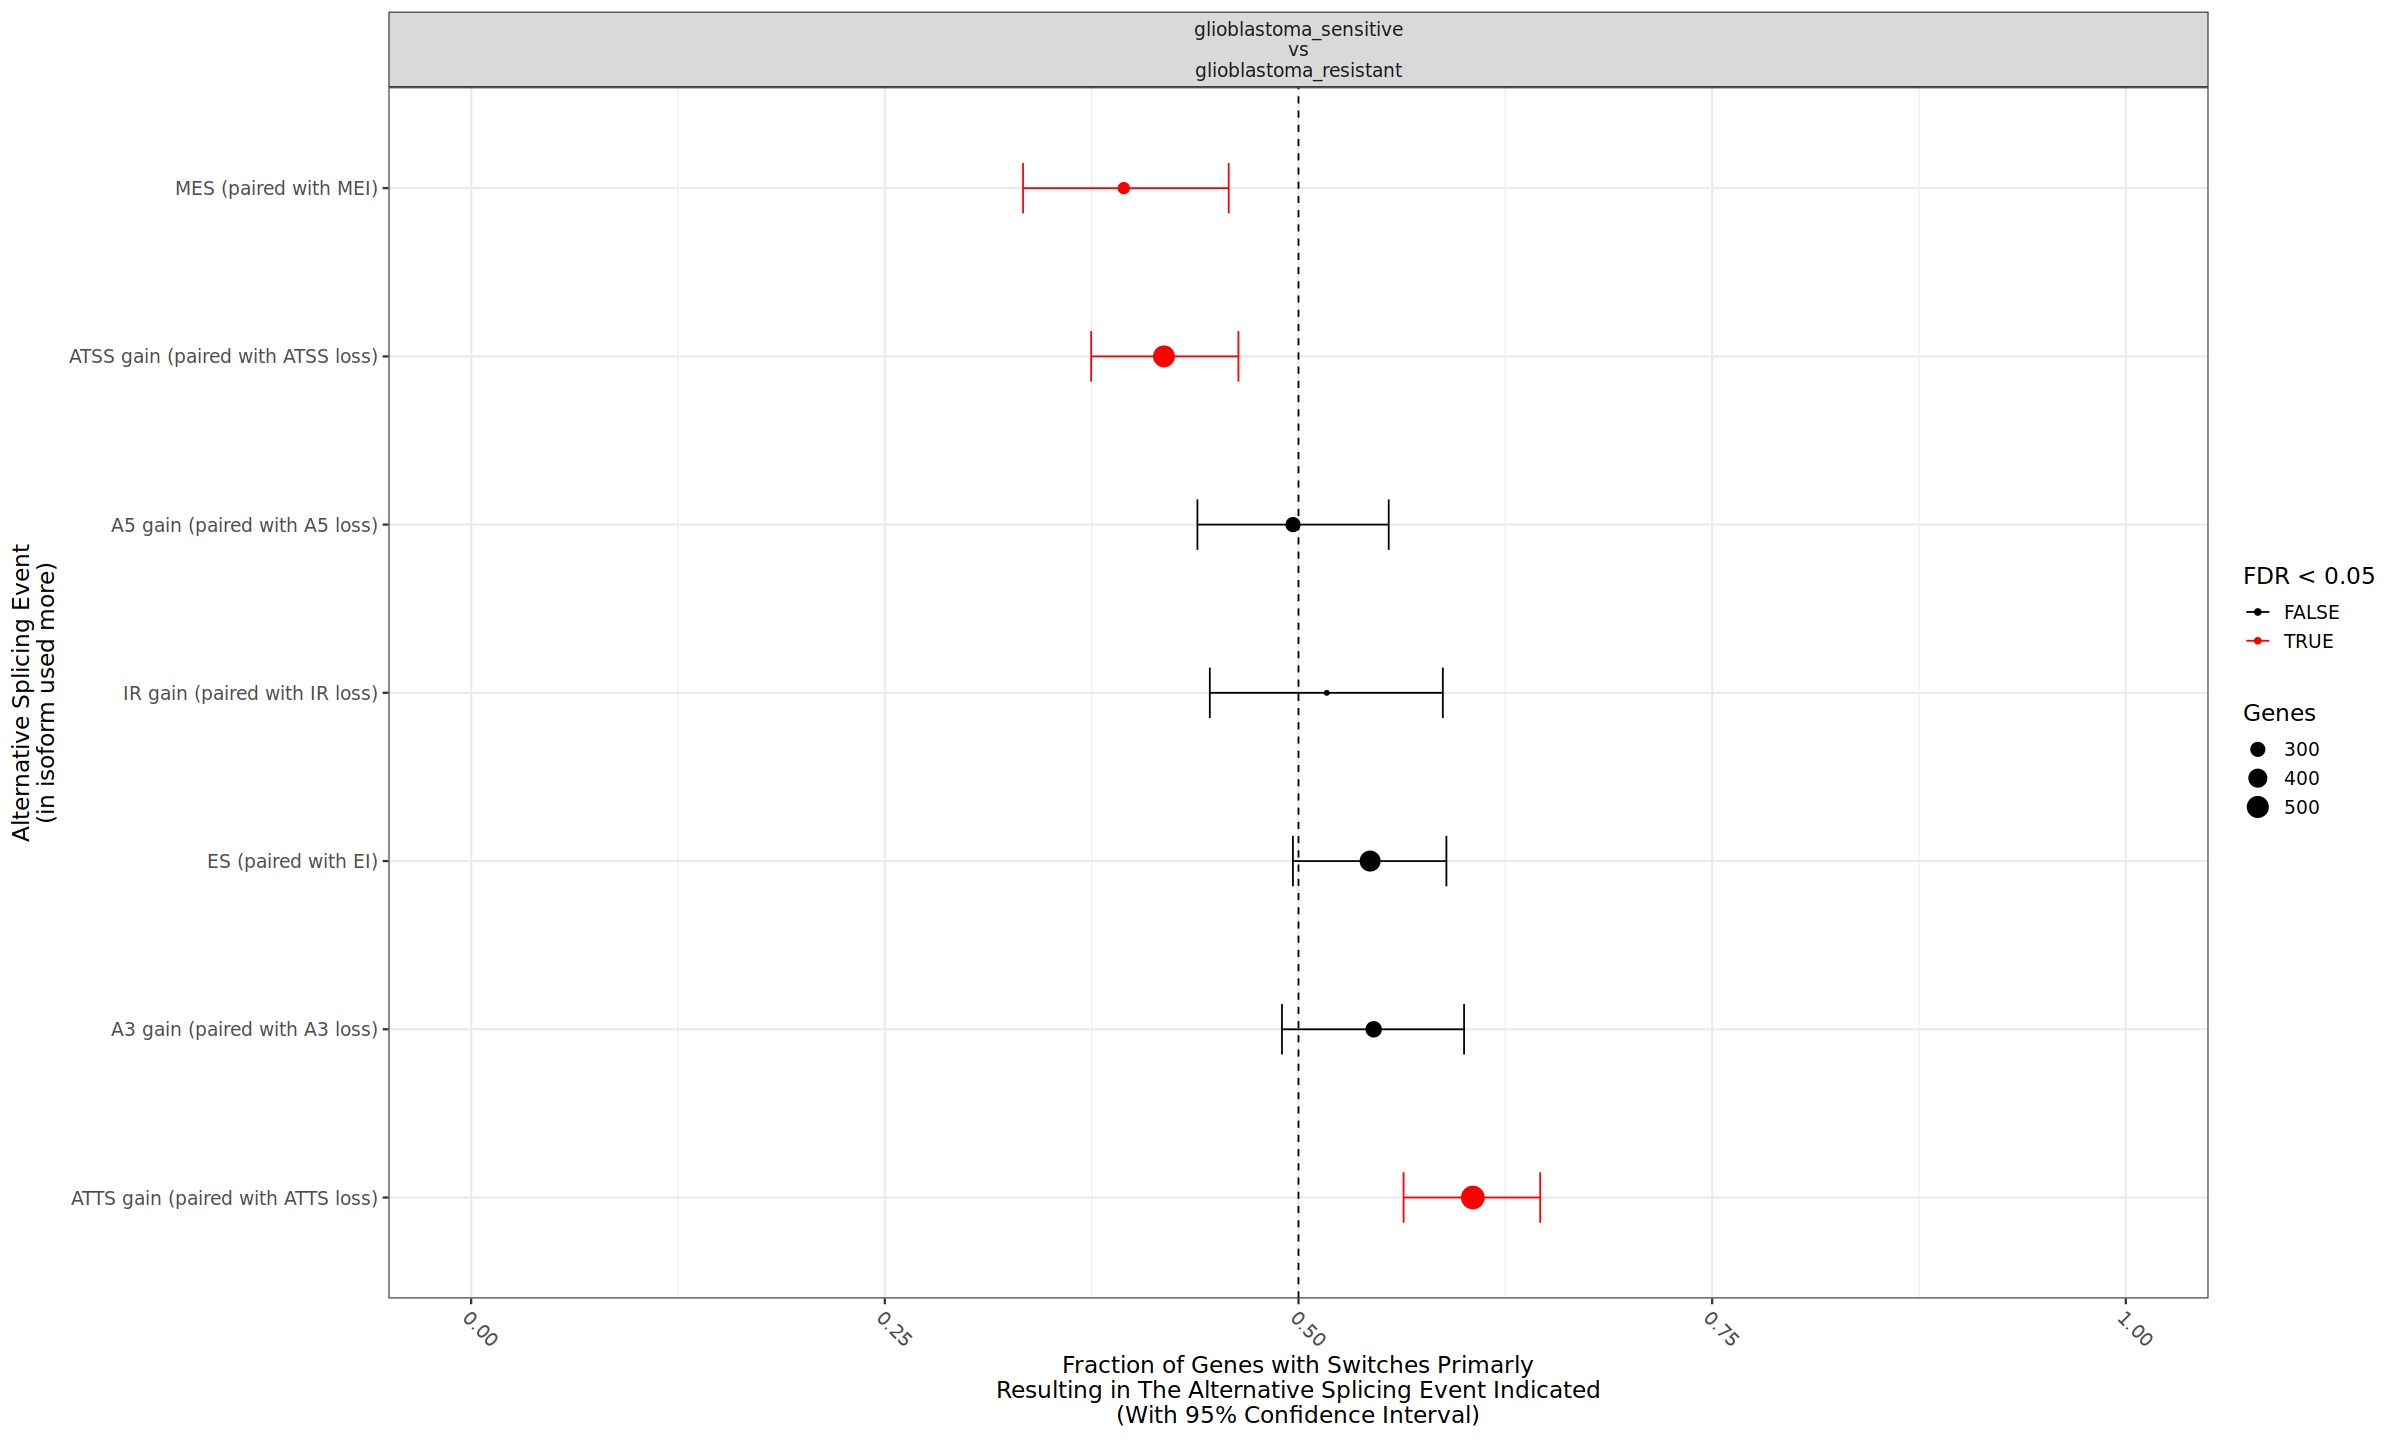

In [21]:
splicingEnrichment <- extractSplicingEnrichment(
    subsetSwitchGB,
    splicingToAnalyze='all',
    returnResult=TRUE,
    returnSummary=TRUE
)

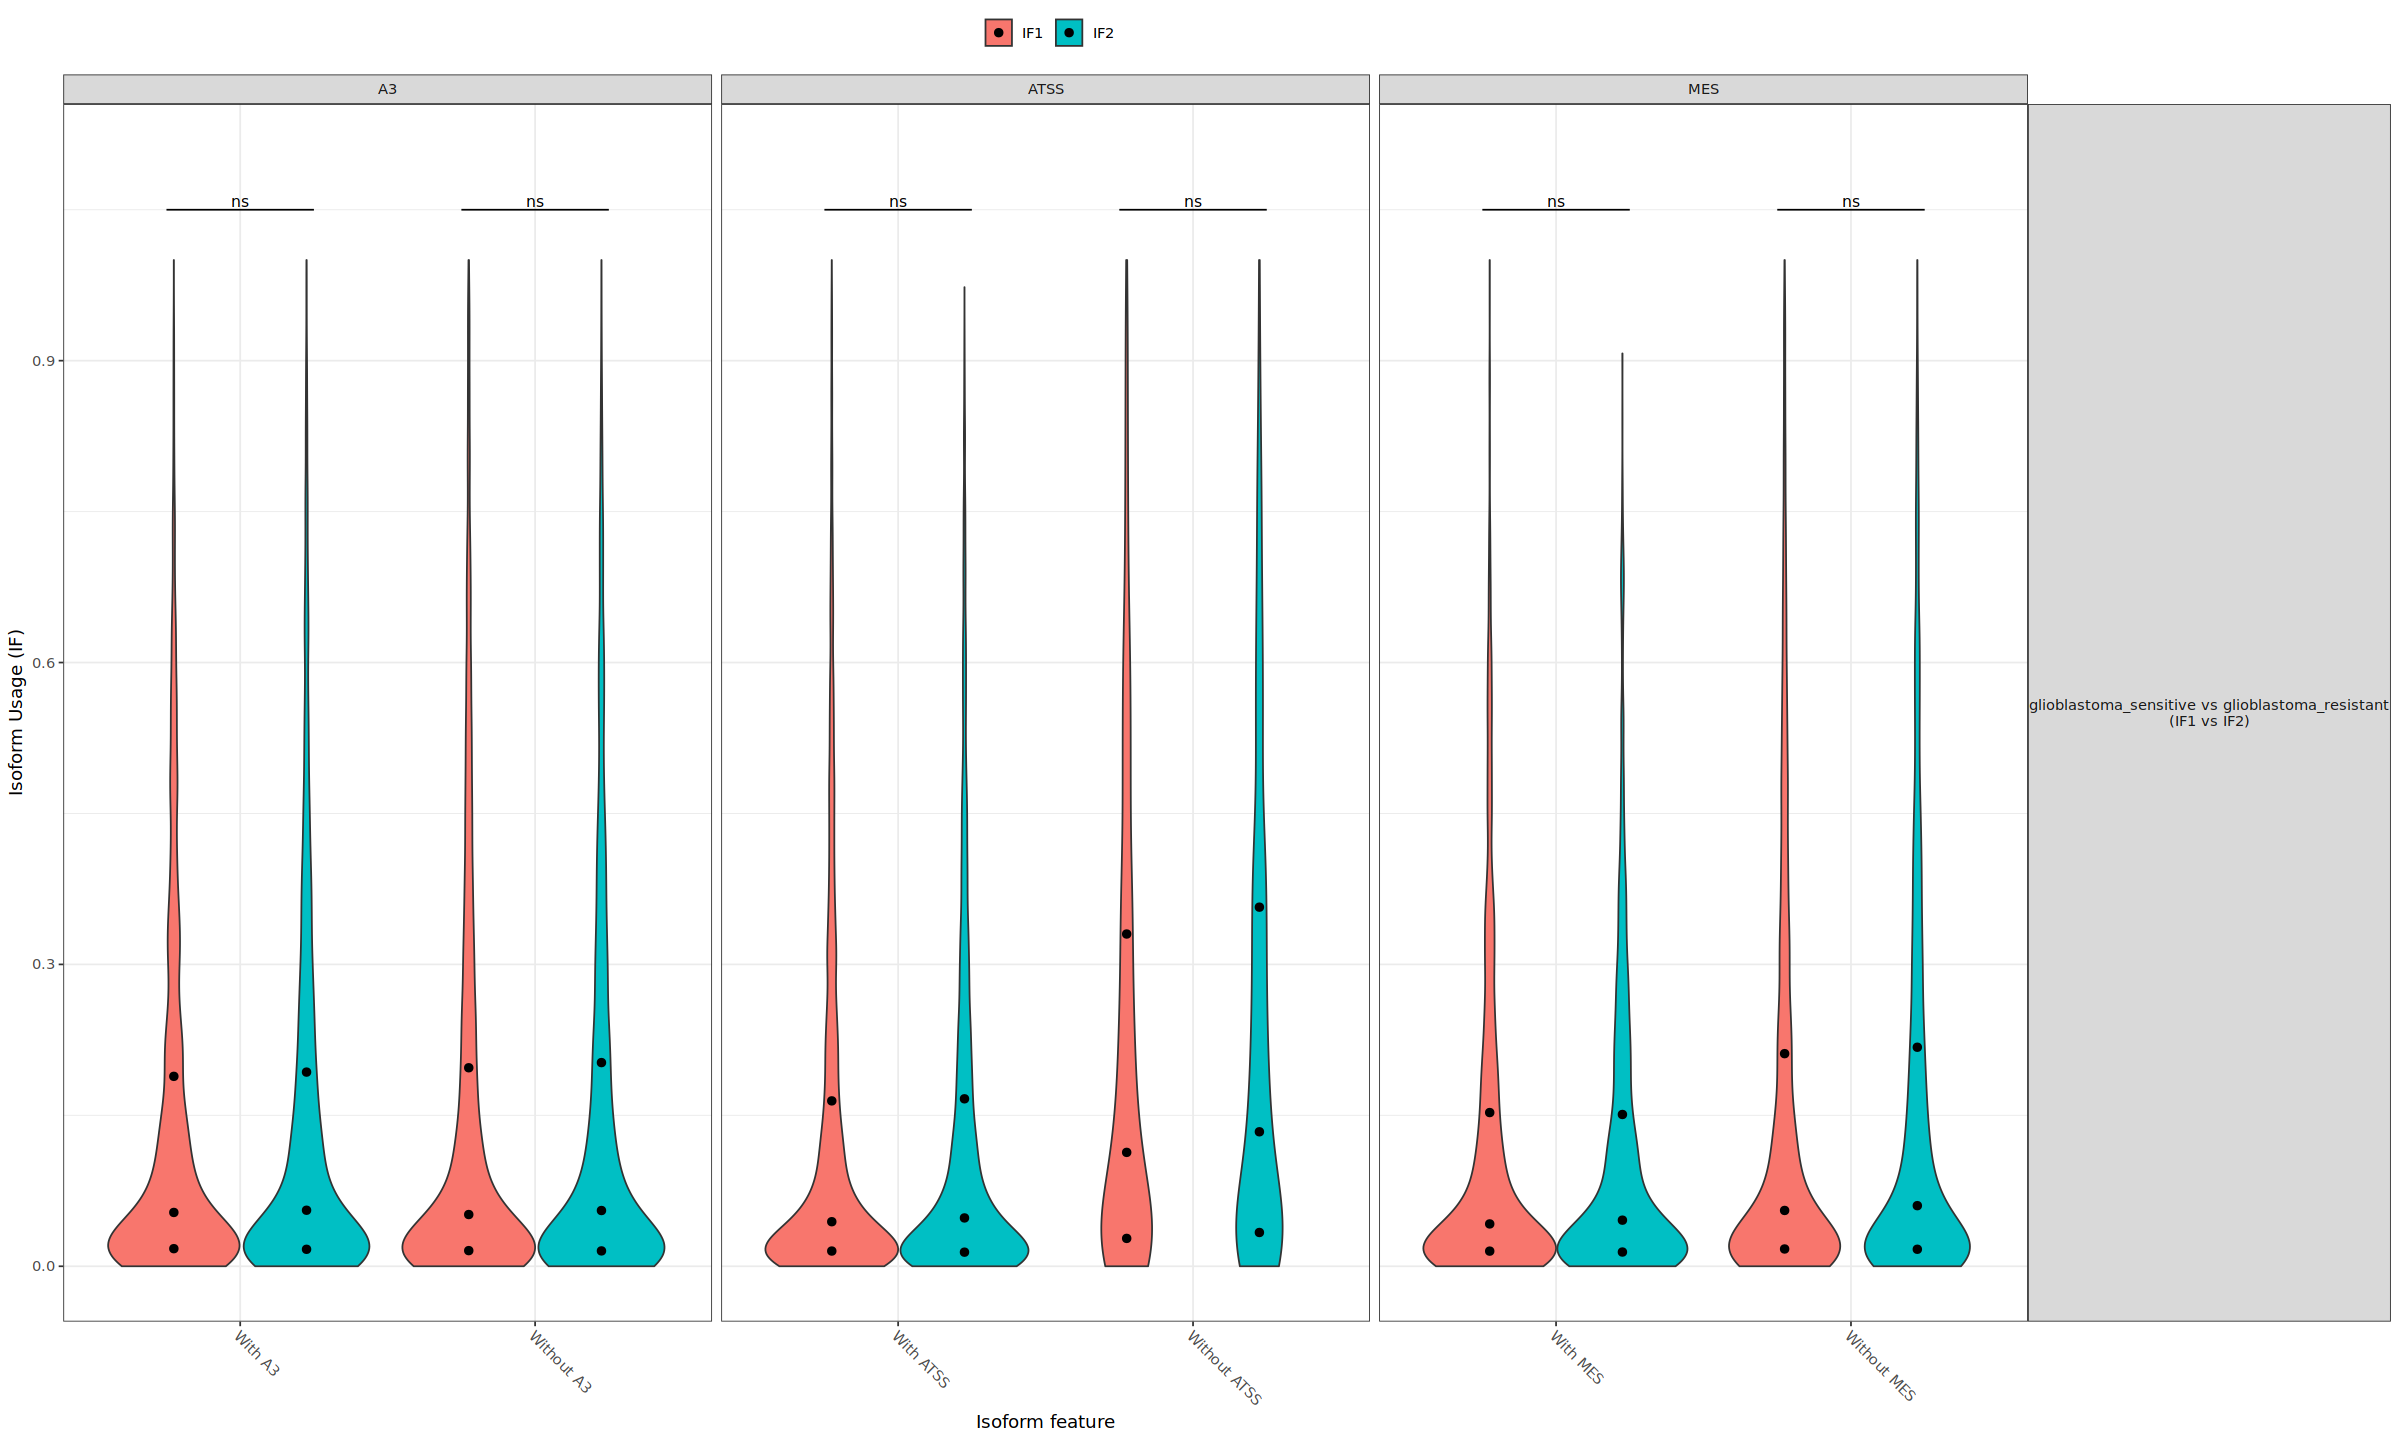

In [24]:
extractSplicingGenomeWide(
    subsetSwitchGB,
    featureToExtract = 'all',                 # all isoforms stored in the switchAnalyzeRlist
    splicingToAnalyze = c('A3','MES','ATSS'), # Splice types significantly enriched in COAD
    plot=TRUE,
    returnResult=FALSE  # Preventing the summary statistics to be returned as a data.frame
)


The classification of alternative splicing is always compared to the hypothetical pre-mRNA constructed by concatenating all exons from isoforms of the same gene.

The alternative splicing types which can be passed to splicingToAnalyze must be a combination of:

* **all** : All of the alternative splicing types indicated below.

* **IR** : Intron Retention.

* **A5** : Alternative 5** donor site (changes in the 5**end of the upstream exon).

* **A3** : Alternative 3** acceptor site (changes in the 3**end of the downstream exon).

* **ATSS** : Alternative Transcription Start Site.

* **ATTS** : Alternative Transcription Termination Site.

* **ES** : Exon Skipping (EI means Exon Inclusion).

* **MES** : Multiple Exon Skipping. Skipping of >1 consecutive exons. (MEI means Multiple Exon Inclusion).

* **MEE** : Mutually Exclusive Exons.


In [ ]:
saveRDS(subsetSwitchGB, file = "SwitchListGB_lncrna_resist.Rds")

## Visualization

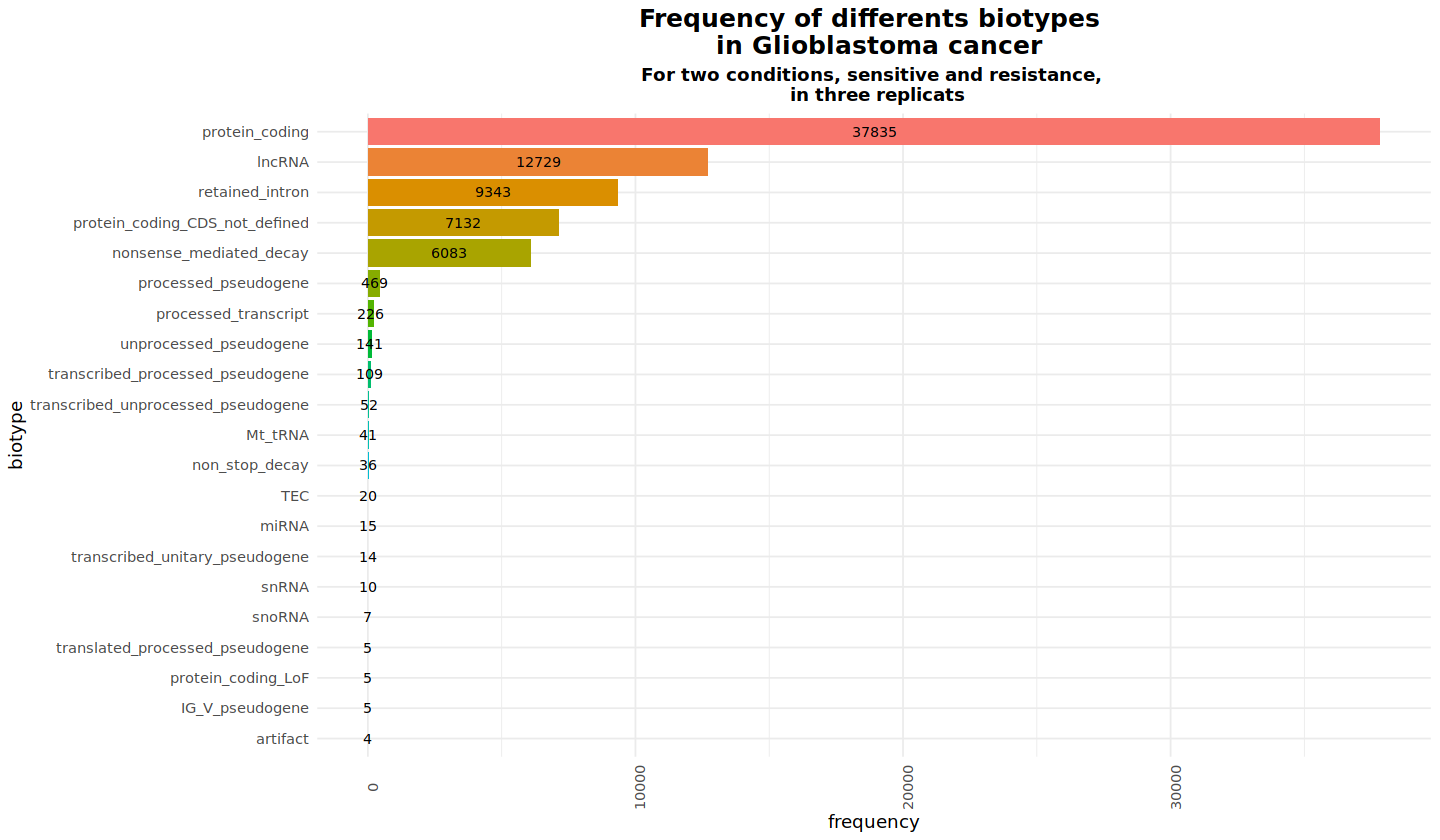

In [38]:
isoformsGB = subsetSwitchGB$isoformFeatures[!duplicated(subsetSwitchGB$isoformFeatures$isoform_id), ]
biotypes_GB <- data.frame(table(isoformsGB$iso_biotype))
colnames(biotypes_GB) <- c('biotype', 'frequency')
biotypes_GB$biotype <- factor(biotypes_GB$biotype, levels = biotypes_GB$biotype[order(biotypes_GB$frequency)])

ggplot(data=biotypes_GB, aes(x=biotype, y=frequency, fill=biotype)) +
  geom_bar(stat="identity") +
  coord_flip() +
  #scale_fill_brewer(palette="Pastel") +
  geom_text(
    aes(label = frequency), position = position_stack(vjust = 0.5), size=3) +
  scale_fill_hue(direction=-1) +
  labs(
    title="Frequency of differents biotypes \n in Glioblastoma cancer",
    subtitle="For two conditions, sensitive and resistance, \n in three replicats") +
  theme_minimal() +
  theme(
    legend.position="none",
    axis.text.x = element_text(angle=90),
    plot.title=element_text(
      size=15L,
      face="bold",
      hjust=0.5
      ),
    plot.subtitle=element_text(
      size=11L,
      face="bold",
      hjust=0.5
      )
    )   

### Cross samples

In [64]:
data <- data.frame(Xdata = rnorm(4), Ydata = rnorm(4), Cancer = c('Glioblastoma', 'Melanoma', 'Prostate Cancer','Lung cancer'))
gplot <- ggplot(data, aes(Xdata, Ydata, color = Cancer)) + geom_point(size = 7) + labs(color = "Cancer types") + scale_color_manual(values = c("#ffc2d1", "#d4e09b", "#fcbf49", "#a2d2ff"))+ theme(legend.key=element_blank(),legend.background=element_blank())
genesCrossSamples <- list(Glioblastoma = unique(subsetSwitchGB$isoformFeatures$gene_id), Melanoma = unique(subsetSwitchMn$isoformFeatures$gene_id), Lung = unique(subsetSwitchLC$isoformFeatures$gene_id), Prostate = unique(subsetSwitchPC$isoformFeatures$gene_id))
genesCrossSamplesDE <- list(Glioblastoma = unique(subsetGB_DE$gene_id), Melanoma = unique(subsetMn_DE$gene_id), Lung = unique(subsetLC_DE$gene_id), Prostate = unique(subsetPC_DE$gene_id))
txCrossSamples <- list(Glioblastoma = unique(subsetSwitchGB$isoformFeatures$isoform_id), Melanoma = unique(subsetSwitchMn$isoformFeatures$isoform_id), Lung = unique(subsetSwitchLC$isoformFeatures$isoform_id), Prostate = unique(subsetSwitchPC$isoformFeatures$isoform_id))
txCrossSamplesDE <- list(Glioblastoma = unique(subsetGB_DE$isoform_id), Melanoma = unique(subsetMn_DE$isoform_id), Lung = unique(subsetLC_DE$isoform_id), Prostate = unique(subsetPC_DE$isoform_id))

options(repr.plot.width=12, repr.plot.height=7)
p1 <- ggvenn(genesCrossSamples, fill_color = c("#ffc2d1", "#fcbf49", "#d4e09b", "#a2d2ff"), stroke_size = 0.2, set_name_size = 0, text_size = 2)
p2 <- ggvenn(genesCrossSamplesDE, fill_color = c("#ffc2d1", "#fcbf49", "#d4e09b", "#a2d2ff"), stroke_size = 0.2, set_name_size = 0, text_size = 2)
p3 <- ggvenn(txCrossSamples, fill_color = c("#ffc2d1", "#fcbf49", "#d4e09b", "#a2d2ff"), stroke_size = 0.2, set_name_size = 0, text_size = 2)
p4 <- ggvenn(txCrossSamplesDE, fill_color = c("#ffc2d1", "#fcbf49", "#d4e09b", "#a2d2ff"), stroke_size = 0.2, set_name_size = 0, text_size = 2)

plots <- list(p1, p2, p3, p4)
legend <- get_legend(gplot + theme(legend.box.margin = margin(0, 0, 0, 12)) + theme(legend.position = "right"))
prow <- plot_grid(p1, p2, p3, p4, align = 'vh', labels = c("genes", "genes DE", "isoforms", "isoforms DE"), label_size = 7, hjust = -1, nrow=2)
prow2 <- plot_grid(prow, legend, rel_widths = c(2, .4))
title <- ggdraw() + draw_label("Venn Diagrams of the number of genes and isoforms before and after DE analysis cross cancer", fontface='bold', size=12)
pdf(paste("venndiag_crosssamples", ".pdf", sep = ""), width = 12, height = 7)
plot_grid(title, prow2, nrow=2, rel_heights=c(0.1, 0.7,0.4,0.1))
dev.off()

png 
  2

In [14]:
Reduce(intersect, list(genesCrossSamplesDE$Glioblastoma, genesCrossSamplesDE$Melanoma, genesCrossSamplesDE$Prostate, genesCrossSamplesDE$Lung))

[1] "ENSG00000080822"

In [34]:
getGeneName <- function(geneID,corresFile){
    geneName <- corresFile$gene_name[corresFile$gene_id == geneID]
    return(geneName)
}
corresFile <- read.table("/groups/dog/aurore/lncrna_resist_cgo/STEP3_DE_allSamples/geneID_geneName_GRCh38.txt",header = T) 

In [17]:
getGeneName('ENSG00000080822', corresFile) 
paste("CLDND1 (Claudin Domain Containing 1) is a Protein Coding gene. Diseases associated with CLDND1 include Renal Cell Carcinoma, Nonpapillary and Breast Cancer.")

[1] "CLDND1"

[1] "CLDND1 (Claudin Domain Containing 1) is a Protein Coding gene. Diseases associated with CLDND1 include Renal Cell Carcinoma, Nonpapillary and Breast Cancer."

In [24]:
tx = Reduce(intersect, list(txCrossSamplesDE$Glioblastoma, txCrossSamplesDE$Prostate, txCrossSamplesDE$Lung))
tx
SwitchList$isoformFeatures[SwitchList$isoformFeatures$isoform_id %in% tx,]

[1] "ENST00000341181"

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
17464,isoComp_00017464,geneComp_00001457,ENST00000341181,ENSG00000080822,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,protein_coding,39.69343,⋯,2.043361,0.2556786,NA,0.5575,0.5315667,0.6707667,0.1392000,NA,NA,FALSE
268546,isoComp_00268546,geneComp_00060663,ENST00000341181,ENSG00000080822,lung_cancer_sensitive,lung_cancer_resistant,NA,protein_coding,protein_coding,39.69343,⋯,2.203131,0.7259295,NA,0.5575,0.3221667,0.5480667,0.2259000,NA,NA,FALSE
519628,isoComp_00519628,geneComp_00119869,ENST00000341181,ENSG00000080822,melanoma_sensitive,melanoma_resistant,NA,protein_coding,protein_coding,39.69343,⋯,2.525282,-0.3822802,NA,0.5575,0.6862667,0.5074333,-0.1788333,NA,NA,FALSE
770710,isoComp_00770710,geneComp_00179075,ENST00000341181,ENSG00000080822,prostate_cancer_sensitive,prostate_cancer_resistant,NA,protein_coding,protein_coding,39.69343,⋯,2.547336,-1.3984169,NA,0.5575,0.6874667,0.5062667,-0.1812000,NA,NA,FALSE


In [25]:
tx = Reduce(intersect, list(txCrossSamplesDE$Glioblastoma, txCrossSamplesDE$Prostate, txCrossSamplesDE$Melanoma))
tx
SwitchList$isoformFeatures[SwitchList$isoformFeatures$isoform_id %in% tx,]

[1] "ENST00000503004" "ENST00000613865" "ENST00000644980"

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
17471,isoComp_00017471,geneComp_00001457,ENST00000503004,ENSG00000080822,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,protein_coding,39.69343,⋯,0.08890482,-5.81346346,NA,0.1803083,0.23546667,0.004233333,-0.23123333,NA,NA,FALSE
75958,isoComp_00075958,geneComp_00007256,ENST00000613865,ENSG00000138326,glioblastoma_sensitive,glioblastoma_resistant,NA,protein_coding,protein_coding,5001.02548,⋯,163.90721273,0.41426613,NA,0.6445583,0.48266667,0.728533333,0.24586667,NA,NA,FALSE
161839,isoComp_00161839,geneComp_00020709,ENST00000644980,ENSG00000225210,glioblastoma_sensitive,glioblastoma_resistant,NA,transcribed_processed_pseudogene,processed_transcript,27.37305,⋯,1.70227494,-0.86202960,NA,0.3191222,0.56290000,0.352400000,-0.21050000,NA,NA,NA
268553,isoComp_00268553,geneComp_00060663,ENST00000503004,ENSG00000080822,lung_cancer_sensitive,lung_cancer_resistant,NA,protein_coding,protein_coding,39.69343,⋯,1.24911976,-1.48241976,NA,0.1803083,0.42913333,0.162100000,-0.26703333,NA,NA,FALSE
327040,isoComp_00327040,geneComp_00066462,ENST00000613865,ENSG00000138326,lung_cancer_sensitive,lung_cancer_resistant,NA,protein_coding,protein_coding,5001.02548,⋯,185.97397453,0.09243416,NA,0.6445583,0.80330000,0.824266667,0.02096667,NA,NA,FALSE
412921,isoComp_00412921,geneComp_00079915,ENST00000644980,ENSG00000225210,lung_cancer_sensitive,lung_cancer_resistant,NA,transcribed_processed_pseudogene,processed_transcript,27.37305,⋯,0.00000000,0.00000000,NA,0.3191222,NaN,NaN,NaN,NA,NA,NA
519635,isoComp_00519635,geneComp_00119869,ENST00000503004,ENSG00000080822,melanoma_sensitive,melanoma_resistant,NA,protein_coding,protein_coding,39.69343,⋯,2.72784755,1.94348051,NA,0.1803083,0.05510000,0.205266667,0.15016667,NA,NA,FALSE
578122,isoComp_00578122,geneComp_00125668,ENST00000613865,ENSG00000138326,melanoma_sensitive,melanoma_resistant,NA,protein_coding,protein_coding,5001.02548,⋯,112.84440740,-0.57758887,NA,0.6445583,0.67256667,0.457733333,-0.21483333,NA,NA,FALSE
664003,isoComp_00664003,geneComp_00139121,ENST00000644980,ENSG00000225210,melanoma_sensitive,melanoma_resistant,NA,transcribed_processed_pseudogene,processed_transcript,27.37305,⋯,1.03743872,1.46476933,NA,0.3191222,0.16166667,0.322233333,0.16056667,NA,NA,NA


In [57]:
GbDESeq <- readRDS(file = "/groups/dog/stage/enora/DESeq2/U251DESeq_lncrna_resist.Rds")
GbDESeq <- subset(data.frame(results(GbDESeq)), abs(data.frame(results(GbDESeq))$log2FoldChange) > 1  & data.frame(results(GbDESeq))$padj < 0.05)
GbDESeq <- unique(SwitchList$isoformFeatures[SwitchList$isoformFeatures$isoform_id %in% rownames(GbDESeq), 4 ])
MnDESeq <- readRDS(file = "/groups/dog/stage/enora/DESeq2/501MelDESeq_lncrna_resist.Rds")
MnDESeq <- subset(data.frame(results(MnDESeq)), abs(data.frame(results(MnDESeq))$log2FoldChange) > 1  & data.frame(results(MnDESeq))$padj < 0.05)
MnDESeq <- unique(SwitchList$isoformFeatures[SwitchList$isoformFeatures$isoform_id %in% rownames(MnDESeq), 4 ])
LcDESeq <- readRDS(file = "/groups/dog/stage/enora/DESeq2/ADCA72DESeq_lncrna_resist.Rds")
LcDESeq <- subset(data.frame(results(LcDESeq)), abs(data.frame(results(LcDESeq))$log2FoldChange) > 1  & data.frame(results(LcDESeq))$padj < 0.05)
LcDESeq <- unique(SwitchList$isoformFeatures[SwitchList$isoformFeatures$isoform_id %in% rownames(LcDESeq), 4 ])
PcDESeq <- readRDS(file = "/groups/dog/stage/enora/DESeq2/PC3DESeq_lncrna_resist.Rds")
PcDESeq <- subset(data.frame(results(PcDESeq)), abs(data.frame(results(PcDESeq))$log2FoldChange) > 1  & data.frame(results(PcDESeq))$padj < 0.05)
PcDESeq <- unique(SwitchList$isoformFeatures[SwitchList$isoformFeatures$isoform_id %in% rownames(PcDESeq), 4 ])

### Intra samples

In [63]:
data <- data.frame(Xdata = rnorm(3), Ydata = rnorm(3), Analysis = c('DTU (DEXSeq within ISA)', 'DGE (DESeq for genes)', 'DTE (DESeq2 for tx)'))
gplot <- ggplot(data, aes(Xdata, Ydata, color = Analysis)) + geom_point(size = 5) + scale_color_manual(values = c("#e7c6ff", "#f08080", "#FEE085")) + theme(legend.key=element_blank(),legend.background=element_blank())

genesAurore = read.csv("/groups/dog/nanopore/lncrna_resist_cgo/secondary/5_DE/up_down_DEG_deseq2_allCancers_padj0.05_LFC1.csv")
genesGB <- list(DTU = subsetGB_DE$gene_id, DGE = genesAurore[genesAurore$cancer=="glioblastoma", 1], DTE = GbDESeq)
genesMn <- list(DTU = subsetMn_DE$gene_id, DGE = genesAurore[genesAurore$cancer=="melanoma", 1], DTE = MnDESeq)
genesLC <- list(DTU = subsetLC_DE$gene_id, DGE = genesAurore[genesAurore$cancer=="lung_cancer", 1], DTE = LcDESeq)
genesPC <- list(DTU = subsetPC_DE$gene_id, DGE = genesAurore[genesAurore$cancer=="prostate_cancer", 1], DTE = PcDESeq)

options(repr.plot.width=12, repr.plot.height=7)
p1 <- ggvenn(genesGB, fill_color = c("#e7c6ff", "#f08080", '#FEE085'), stroke_size = 0.2, set_name_size = 0, text_size = 3)
p2 <- ggvenn(genesMn, fill_color = c("#e7c6ff", "#f08080", '#FEE085'), stroke_size = 0.2, set_name_size = 0, text_size = 3)
p3 <- ggvenn(genesLC, fill_color = c("#e7c6ff", "#f08080", '#FEE085'), stroke_size = 0.2, set_name_size = 0, text_size = 3)
p4 <- ggvenn(genesPC, fill_color = c("#e7c6ff", "#f08080", '#FEE085'), stroke_size = 0.2, set_name_size = 0, text_size = 3)

plots <- list(p1, p2, p3, p4)
legend <- get_legend(gplot + theme(legend.box.margin = margin(0, 0, 0, 12)) + theme(legend.position = "right"))
prow <- plot_grid(p1, p2, p3, p4, align = 'vh', labels = c("Glioblastoma", "Melanoma", "Lung Cancer", "Prostate Cancer"), label_size = 10, hjust = -1, nrow=2)
prow2 <- plot_grid(prow, legend, rel_widths = c(2, 0.7))
title <- ggdraw() + draw_label("Venn Diagrams of the number of genes DE of different analysis", fontface='bold', size=12)
pdf(paste("venndiag_percancer", ".pdf", sep = ""), width = 12, height = 7)
plot_grid(title, prow2, nrow=2, rel_heights=c(0.1, 0.7, 0.4, 0.1))
dev.off()

png 
  2

### Down-regulated genes DEXSeq

In [72]:
palette = c(
    '#85AE5B', # green
    '#adc178', # olive
    '#5C9EC1', # blue sky
    '#ade8f4', # baby blue
    '#e7c6ff', # lavander
    '#ffc2d1', # pink
    '#EB9784', # coral
    '#A7333F', # red
    '#C44536', # persian red
    '#f79d65', # orange
    '#F4B266', # ocre
    '#F6D379',  # yellow
    '#F2B79F',
    '#B6A6CA',
    '#006633'
)

In [66]:
downRegTx <- list('Glioblastoma' = subsetGB_DE$isoform_id[subsetGB_DE$dIF < 0.1], 'Melanoma' = subsetMn_DE$isoform_id[subsetMn_DE$dIF < 0.1], 'Lung Cancer' = subsetLC_DE$isoform_id[subsetLC_DE$dIF < 0.1], 'Prostate Cancer' = subsetPC_DE$isoform_id[subsetPC_DE$dIF < 0.1])
pdf(paste("upsetplot_downDTU", ".pdf", sep = ""), width = 12, height = 7)
UpSetR::upset(
    fromList(downRegTx), 
    keep.order=TRUE, 
    sets.bar.color=c("#ffc2d1",  "#a2d2ff", "#fcbf49", "#d4e09b"),
    point.size = 4, line.size = 1, text.scale=2,
    queries = list(
        list(
            query = intersects, 
            params = list("Glioblastoma"), 
            active = T,
            color = "#ffc2d1"),
        list(
            query = intersects, 
            params = list("Prostate Cancer"), 
            active = T,
            color = "#a2d2ff"),
        list(
            query = intersects, 
            params = list("Melanoma"), 
            active = T,
            color = "#fcbf49"),
        list(
            query = intersects, 
            params = list("Lung Cancer"), 
            active = T,
            color = "#d4e09b"),
        list(
            query = intersects, 
            params = list("Glioblastoma", "Prostate Cancer"), 
            active = T,
            color = "#C44536"),
        list(
            query = intersects, 
            params = list("Glioblastoma", "Lung Cancer"), 
            active = T,
            color = "#5C9EC1"),
        list(
            query = intersects, 
            params = list("Glioblastoma", "Melanoma"), 
            active = T,
            color = "#adc178"),
        list(
            query = intersects, 
            params = list("Prostate Cancer", "Melanoma"), 
            active = T,
            color = "#f79d65")
    ))
dev.off()

png 
  2

### Up-regulated genes DEXSeq

In [67]:
upRegTx <- list('Glioblastoma' = subsetGB_DE$isoform_id[subsetGB_DE$dIF > 0.1], 'Melanoma' = subsetMn_DE$isoform_id[subsetMn_DE$dIF > 0.1], 'Lung Cancer' = subsetLC_DE$isoform_id[subsetLC_DE$dIF > 0.1], 'Prostate Cancer' = subsetPC_DE$isoform_id[subsetPC_DE$dIF > 0.1])
pdf(paste("upsetplot_upDTU", ".pdf", sep = ""), width = 12, height = 7)
UpSetR::upset(
    fromList(upRegTx), 
    keep.order=TRUE, 
    sets.bar.color=c("#ffc2d1",  "#a2d2ff", "#fcbf49", "#d4e09b"),
    point.size = 4, line.size = 1, text.scale = 2,
    queries = list(
        list(
            query = intersects, 
            params = list("Glioblastoma"), 
            active = T,
            color = "#ffc2d1"),
        list(
            query = intersects, 
            params = list("Prostate Cancer"), 
            active = T,
            color = "#a2d2ff"),
        list(
            query = intersects, 
            params = list("Melanoma"), 
            active = T,
            color = "#fcbf49"),
        list(
            query = intersects, 
            params = list("Lung Cancer"), 
            active = T,
            color = "#d4e09b"),
        list(
            query = intersects, 
            params = list("Lung Cancer", "Prostate Cancer"), 
            active = T),
        list(
            query = intersects, 
            params = list("Lung Cancer", "Glioblastoma"), 
            active = T,
            color="#5C9EC1"),
        list(
            query = intersects, 
            params = list("Melanoma", "Prostate Cancer"), 
            active = T,
            color="#f79d65"),
        list(
            query = intersects, 
            params = list("Melanoma", "Glioblastoma"), 
            active = T,
            color = "#adc178"),
        list(
            query = intersects, 
            params = list("Prostate Cancer", "Glioblastoma"), 
            active = T,
            color = "#C44536")
    )
)
dev.off()

png 
  2

In [ ]:
Reduce(intersect, list(downRegTx$Glioblastoma, downRegTx$Melanoma,
                      downRegTx$Lung Cancer))

In [74]:
Glioblastoma = subsetSwitchGB_DE$isoformFeatures[abs(subsetSwitchGB_DE$isoformFeatures$dIF) > 0.1  & subsetSwitchGB_DE$isoformFeatures$isoform_switch_q_value < 0.05, 3]
Melanoma = subsetSwitchMn_DE$isoformFeatures[abs(subsetSwitchMn_DE$isoformFeatures$dIF) > 0.1  & subsetSwitchMn_DE$isoformFeatures$isoform_switch_q_value < 0.05, 3]
LungCancer = subsetSwitchLC_DE$isoformFeatures[abs(subsetSwitchLC_DE$isoformFeatures$dIF) > 0.1  & subsetSwitchLC_DE$isoformFeatures$isoform_switch_q_value < 0.05, 3]
ProstateCancer = subsetSwitchPC_DE$isoformFeatures[abs(subsetSwitchPC_DE$isoformFeatures$dIF) > 0.1  & subsetSwitchPC_DE$isoformFeatures$isoform_switch_q_value < 0.05, 3]
allRegTx <- list('Glioblastoma' = Glioblastoma[!is.na(Glioblastoma)], 'Melanoma' = Melanoma[!is.na(Melanoma)], 'Lung Cancer' = LungCancer[!is.na(LungCancer)], 'Prostate Cancer' = ProstateCancer[!is.na(ProstateCancer)])

pdf(paste("upsetplot_allDTU", ".pdf", sep = ""), width = 12, height = 7)
UpSetR::upset(fromList(allRegTx), keep.order = T, 
    sets.bar.color=c("#ffc2d1",  "#a2d2ff", "#fcbf49", "#d4e09b"),
    point.size = 4, line.size = 1, text.scale = 2,
    queries = list(
        list(
            query = intersects, 
            params = list("Glioblastoma"), 
            active = T,
            color = "#ffc2d1"),
        list(
            query = intersects, 
            params = list("Prostate Cancer"), 
            active = T,
            color = "#a2d2ff"),
        list(
            query = intersects, 
            params = list("Melanoma"), 
            active = T,
            color = "#fcbf49"),
        list(
            query = intersects, 
            params = list("Lung Cancer"), 
            active = T,
            color = "#d4e09b"),
        list(
            query = intersects, 
            params = list("Lung Cancer", "Prostate Cancer"), 
            active = T),
        list(
            query = intersects, 
            params = list("Lung Cancer", "Glioblastoma"), 
            active = T,
            color="#5C9EC1"),
        list(
            query = intersects, 
            params = list("Melanoma", "Prostate Cancer"), 
            active = T,
            color="#f79d65"),
        list(
            query = intersects, 
            params = list("Melanoma", "Glioblastoma"), 
            active = T,
            color = "#adc178"),
        list(
            query = intersects, 
            params = list("Prostate Cancer", "Glioblastoma"), 
            active = T,
            color = "#C44536"),
        list(
            query = intersects, 
            params = list("Melanoma", "Glioblastoma", "Prostate Cancer"), 
            active = T,
            color = "#e7c6ff"),
        list(
            query = intersects, 
            params = list("Glioblastoma", "Prostate Cancer", "Lung Cancer"), 
            active = T,
            color = "#EB9784")
      )      
)
dev.off()

png 
  2

In [51]:
dev.off()

pdf 
  3

DTU in common across cancers

In [28]:
# function to retrieve dataframe containing DTU in common across cancers
getCommonDTU <- function(filteredDTUdf){
    # if gene in common, associate cancer in a new column
    df <- filteredDTUdf %>% group_by(isoform_id) %>% 
    mutate(ccancer=paste0(substring(condition_1, 1, nchar(condition_1)-10),collapse="|")) %>% 
    dplyr::select(isoform_id, gene_id, seqnames,start,end, width, strand, gene_name, gene_biotype, isoform_annot, gene_annot, iso_biotype,ccancer)
    # remove duplicates
    df <- df[!duplicated(df), ]
    # keep only DTU in common
    df2 <- dplyr::filter(df, grepl("\\|",ccancer))
    return(df2)
}

In [30]:
allcancersDown <- rbind(
    subsetGB_DE[subsetGB_DE$dIF < 0.1, ], 
    subsetMn_DE[subsetMn_DE$dIF < 0.1, ],
    subsetLC_DE[subsetLC_DE$dIF < 0.1, ],
    subsetPC_DE[subsetPC_DE$dIF < 0.1, ])
allcancersUp <- rbind(
    subsetGB_DE[subsetGB_DE$dIF > 0.1, ], 
    subsetMn_DE[subsetMn_DE$dIF > 0.1, ],
    subsetLC_DE[subsetLC_DE$dIF > 0.1, ],
    subsetPC_DE[subsetPC_DE$dIF > 0.1, ])
allcancersUpDown <- rbind(
    subsetGB_DE, 
    subsetMn_DE,
    subsetLC_DE,
    subsetPC_DE)

In [39]:
downDTUc <- getCommonDTU(allcancersDown)
upDTUc <- getCommonDTU(allcancersUp)
updownDTUc <- getCommonDTU(allcancersUpDown)

In [40]:
print(paste0("nb of down DTU in common in cancers (alpha 5% + abs(dIF) > 0.1): ",nrow(downDTUc)))
print(paste0("nb of up DTU in common in cancers (alpha 5% + abs(dIF) > 0.1): ",nrow(upDTUc)))
print(paste0("nb of up/down DTU in common in cancers (alpha 5% + abs(dIF) > 0.1): ",nrow(updownDTUc)))

[1] "nb of down DTU in common in cancers (alpha 5% + abs(dIF) > 0.1): 24"
[1] "nb of up DTU in common in cancers (alpha 5% + abs(dIF) > 0.1): 17"
[1] "nb of up/down DTU in common in cancers (alpha 5% + abs(dIF) > 0.1): 62"


In [43]:
print("gene biotype and annotation for down DTU in common among cancers")
table(downDTUc$iso_biotype, downDTUc$isoform_annot)
print("gene biotype and annotation for up DTU in common among cancers")
table(upDTUc$iso_biotype, upDTUc$isoform_annot)
print("gene biotype and annotation for both up/down DTU in common among cancers")
table(updownDTUc$iso_biotype, updownDTUc$isoform_annot)

[1] "gene biotype and annotation for down DTU in common among cancers"


                         
                          KNOWN NOVEL
  lncRNA                      2     0
  nonsense_mediated_decay     1     0
  processed_transcript        1     0
  protein_coding             17     2
  unprocessed_pseudogene      0     1

[1] "gene biotype and annotation for up DTU in common among cancers"


                 
                  KNOWN NOVEL
  protein_coding     13     1
  retained_intron     3     0

[1] "gene biotype and annotation for both up/down DTU in common among cancers"


                                  
                                   KNOWN NOVEL
  lncRNA                               6     1
  nonsense_mediated_decay              2     0
  processed_transcript                 2     0
  protein_coding                      40     3
  protein_coding_CDS_not_defined       2     0
  retained_intron                      4     0
  transcribed_processed_pseudogene     0     1
  unprocessed_pseudogene               0     1

In [64]:
allcancers = rbind(subsetSwitchGB_DE, subsetSwitchMn_DE, subsetSwitchLC_DE, subsetSwitchPC_DE)
allcancersUp = allcancers[allcancers$dIF > 0.1, ]
allcancersDown = allcancers[allcancers$ dIF < 0.1, ]

In [69]:
 # downDTU in common
downDTUc <- getCommonDTU(allcancersDown)
# upDTU in common
upDTUc <- getCommonDTU(allcancersUp)
#up/down DTU in common
updownDTUc <- getCommonDTU(allcancers)

ERROR: Error in (function (cond) : error in evaluating the argument 'x' in selecting a method for function 'select': [1m[22mMust group by variables found in `.data`.
[31m✖[39m Column `geneID` is not found.
